## Problem Formulation
- We want to understand the factors that affect car prices.
- We want to be able to predict car prices based on our data variables

In [1]:
# loading libraries
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

#To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [20]:
data = pd.read_csv('CarPrice_Assignment.csv')

print(data.shape)

(205, 26)


In [3]:
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

## DATA PREPROCESSING

### EDA

In [4]:
# Investigate all elements within each feature


for column in data:
    unique_values = np.unique(data[column])
    num_values = len(unique_values)
    if num_values < 10:
        print(f'The number of values for feature {column} is {num_values} and they are {unique_values}')
    else:
        print(f'The number of values for feature {column} is {num_values}')

        

The number of values for feature car_ID is 205
The number of values for feature symboling is 6 and they are [-2 -1  0  1  2  3]
The number of values for feature CarName is 147
The number of values for feature fueltype is 2 and they are ['diesel' 'gas']
The number of values for feature aspiration is 2 and they are ['std' 'turbo']
The number of values for feature doornumber is 2 and they are ['four' 'two']
The number of values for feature carbody is 5 and they are ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel is 3 and they are ['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation is 2 and they are ['front' 'rear']
The number of values for feature wheelbase is 53
The number of values for feature carlength is 75
The number of values for feature carwidth is 44
The number of values for feature carheight is 49
The number of values for feature curbweight is 171
The number of values for feature enginetype is 7 and they are ['dohc

In [5]:
# checking for null values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
   # Investigating relationships among numeric values with scatterplots

In [22]:
plt.style.use('fivethirtyeight')


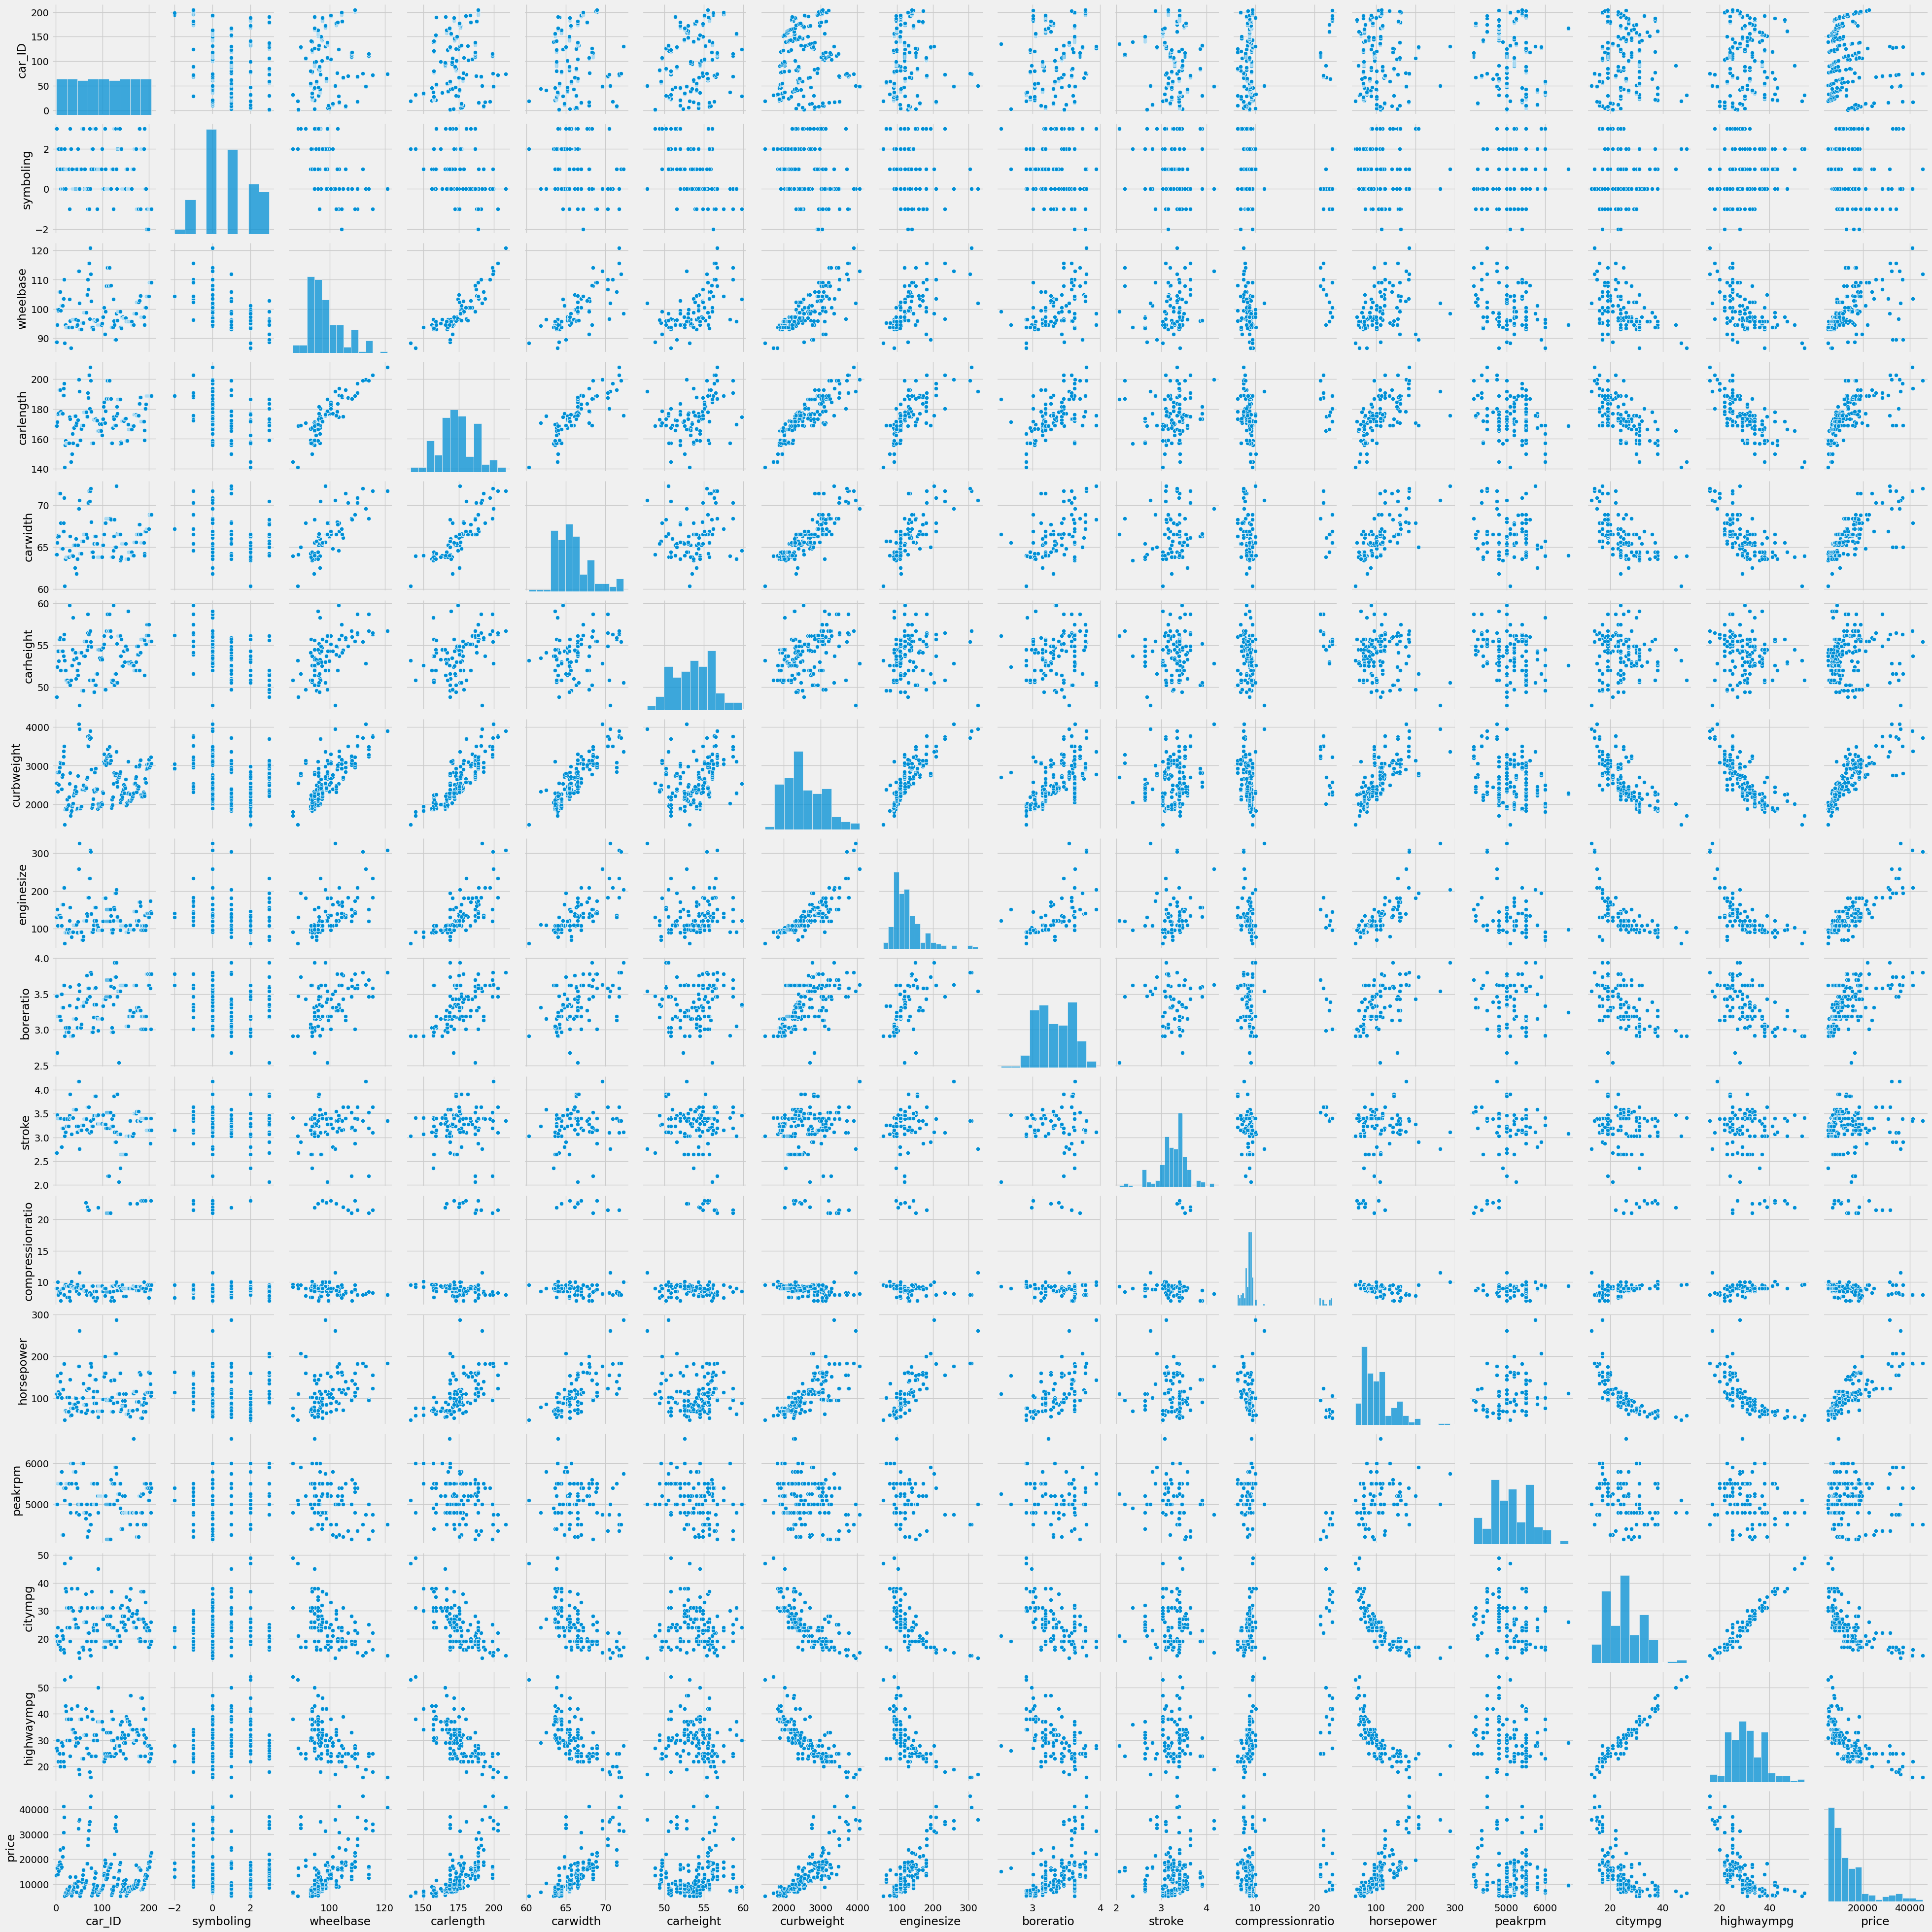

In [8]:
sns.pairplot(data)

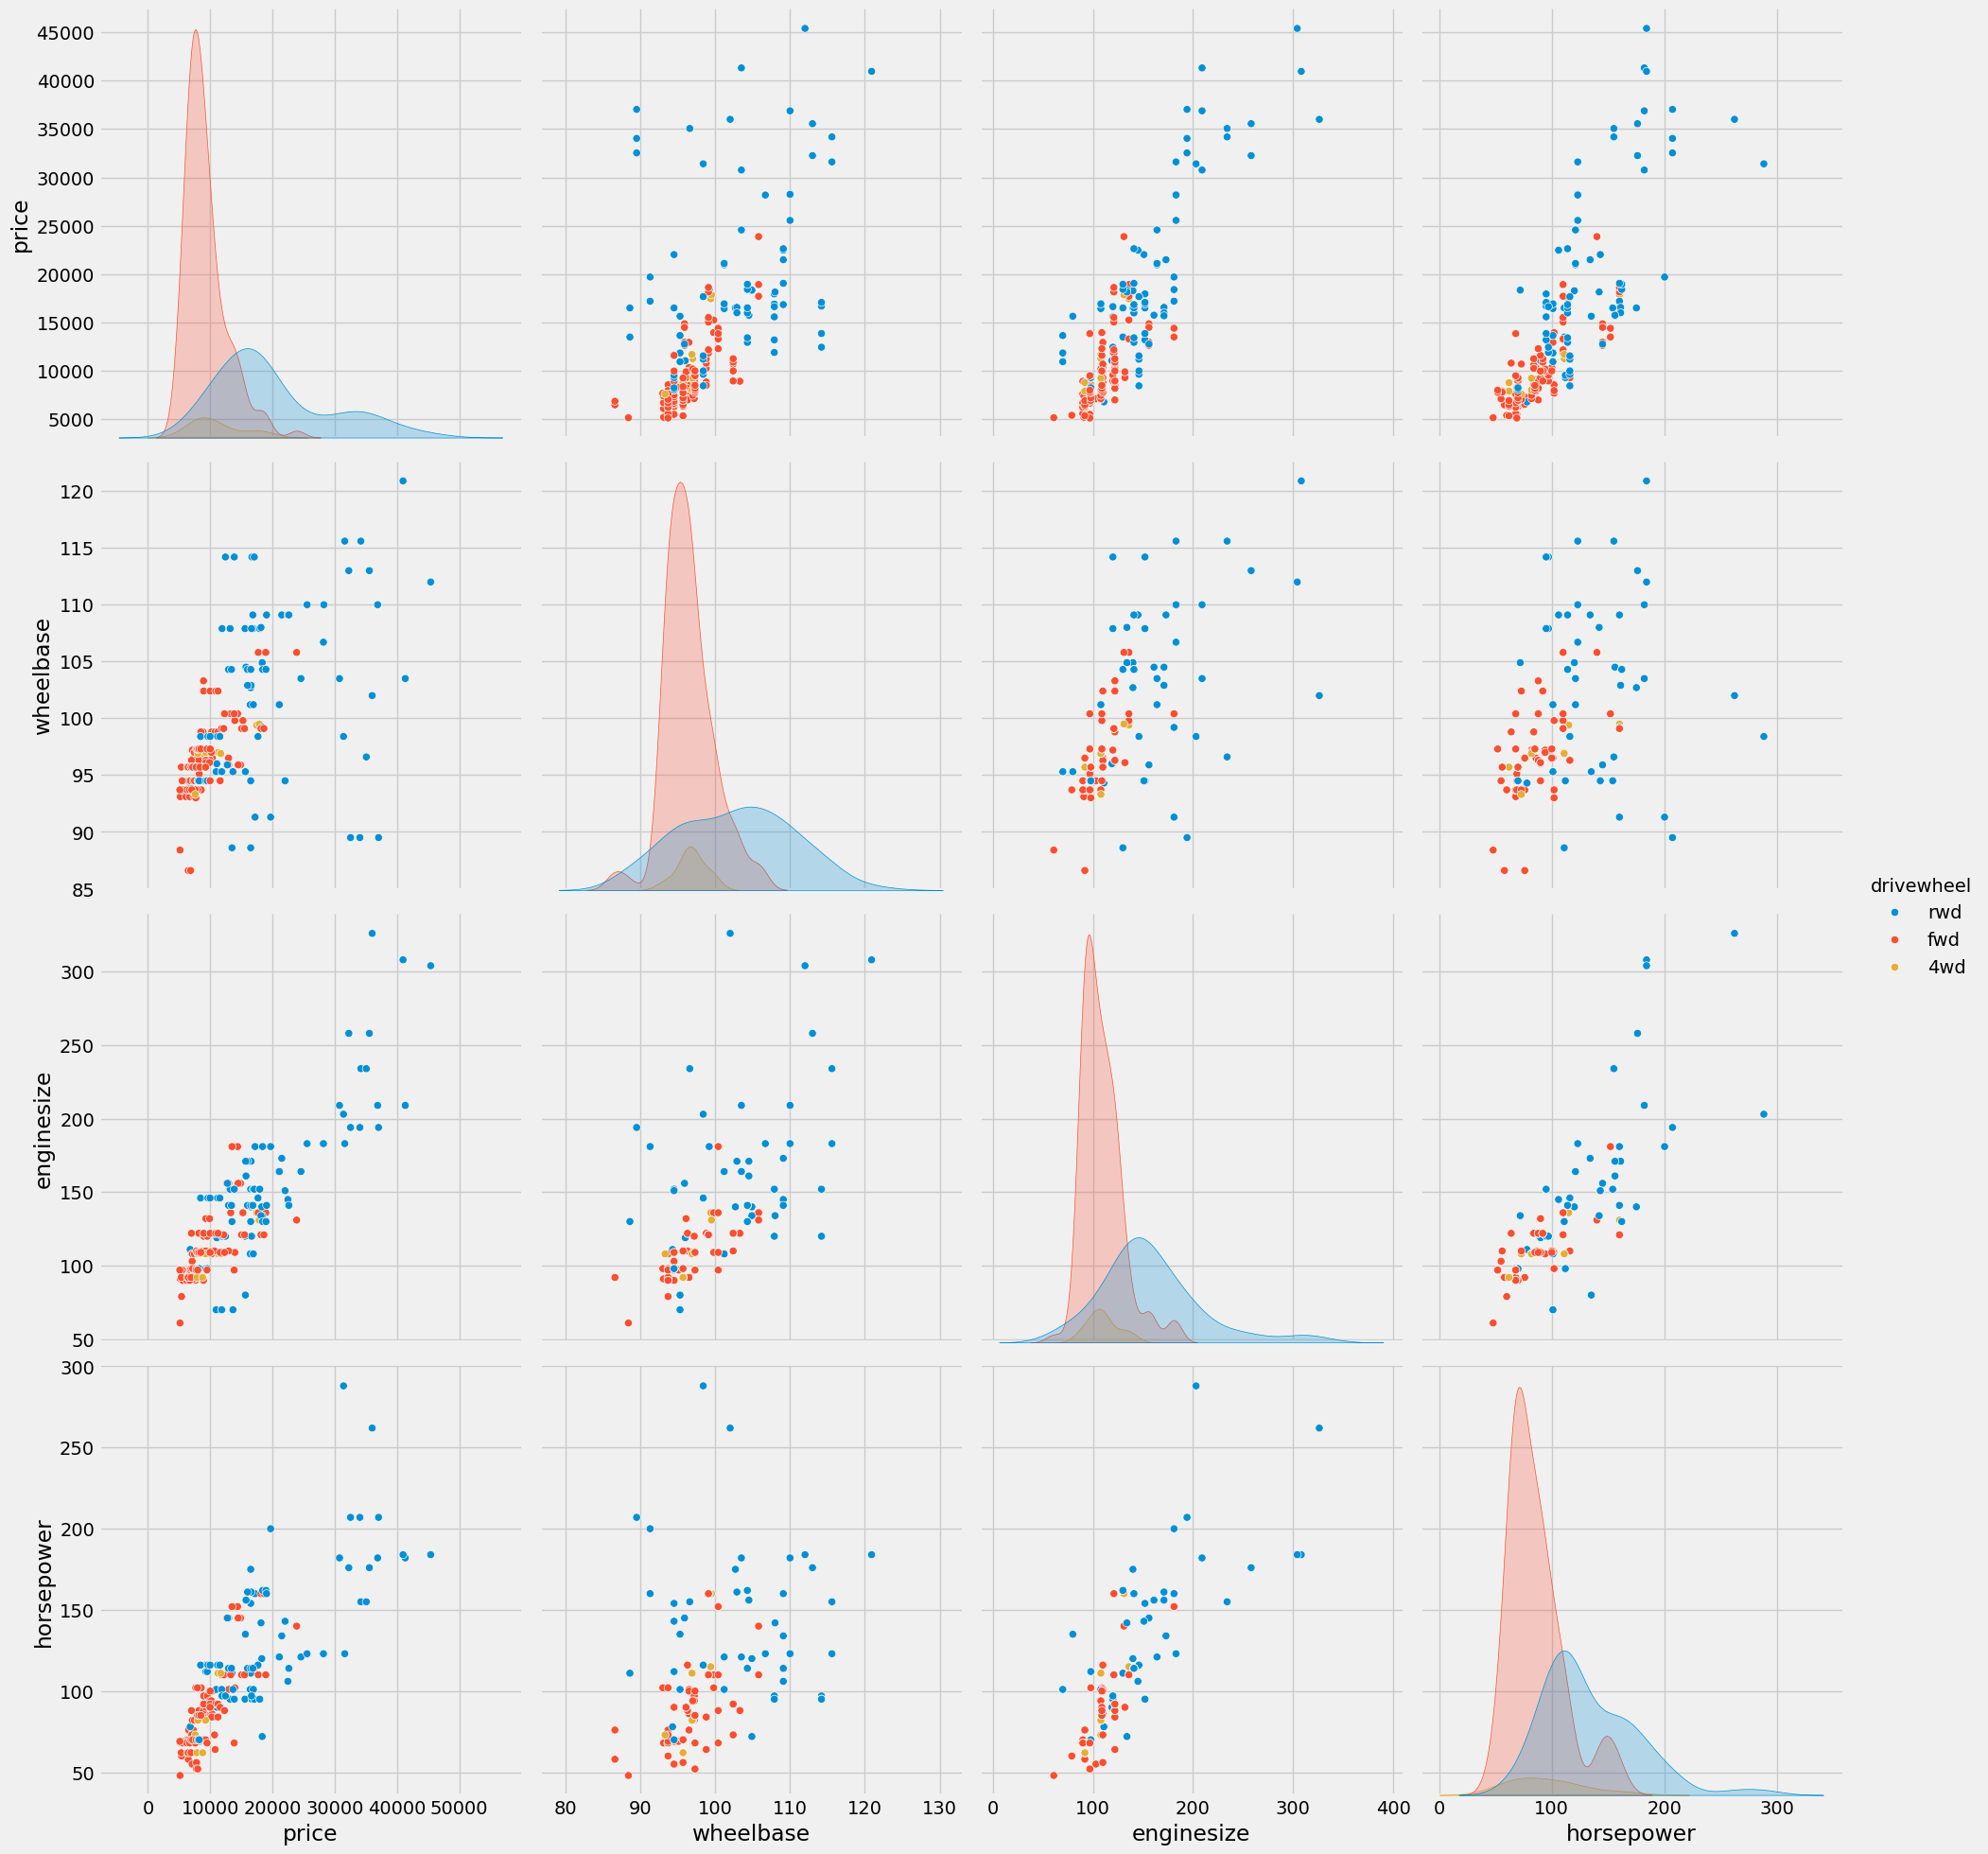

In [9]:
#Visualising a subset of our data ie. variables with visible patterns
g = sns.pairplot(data[['price','wheelbase','enginesize','horsepower','drivewheel']],hue='drivewheel', height = 5)

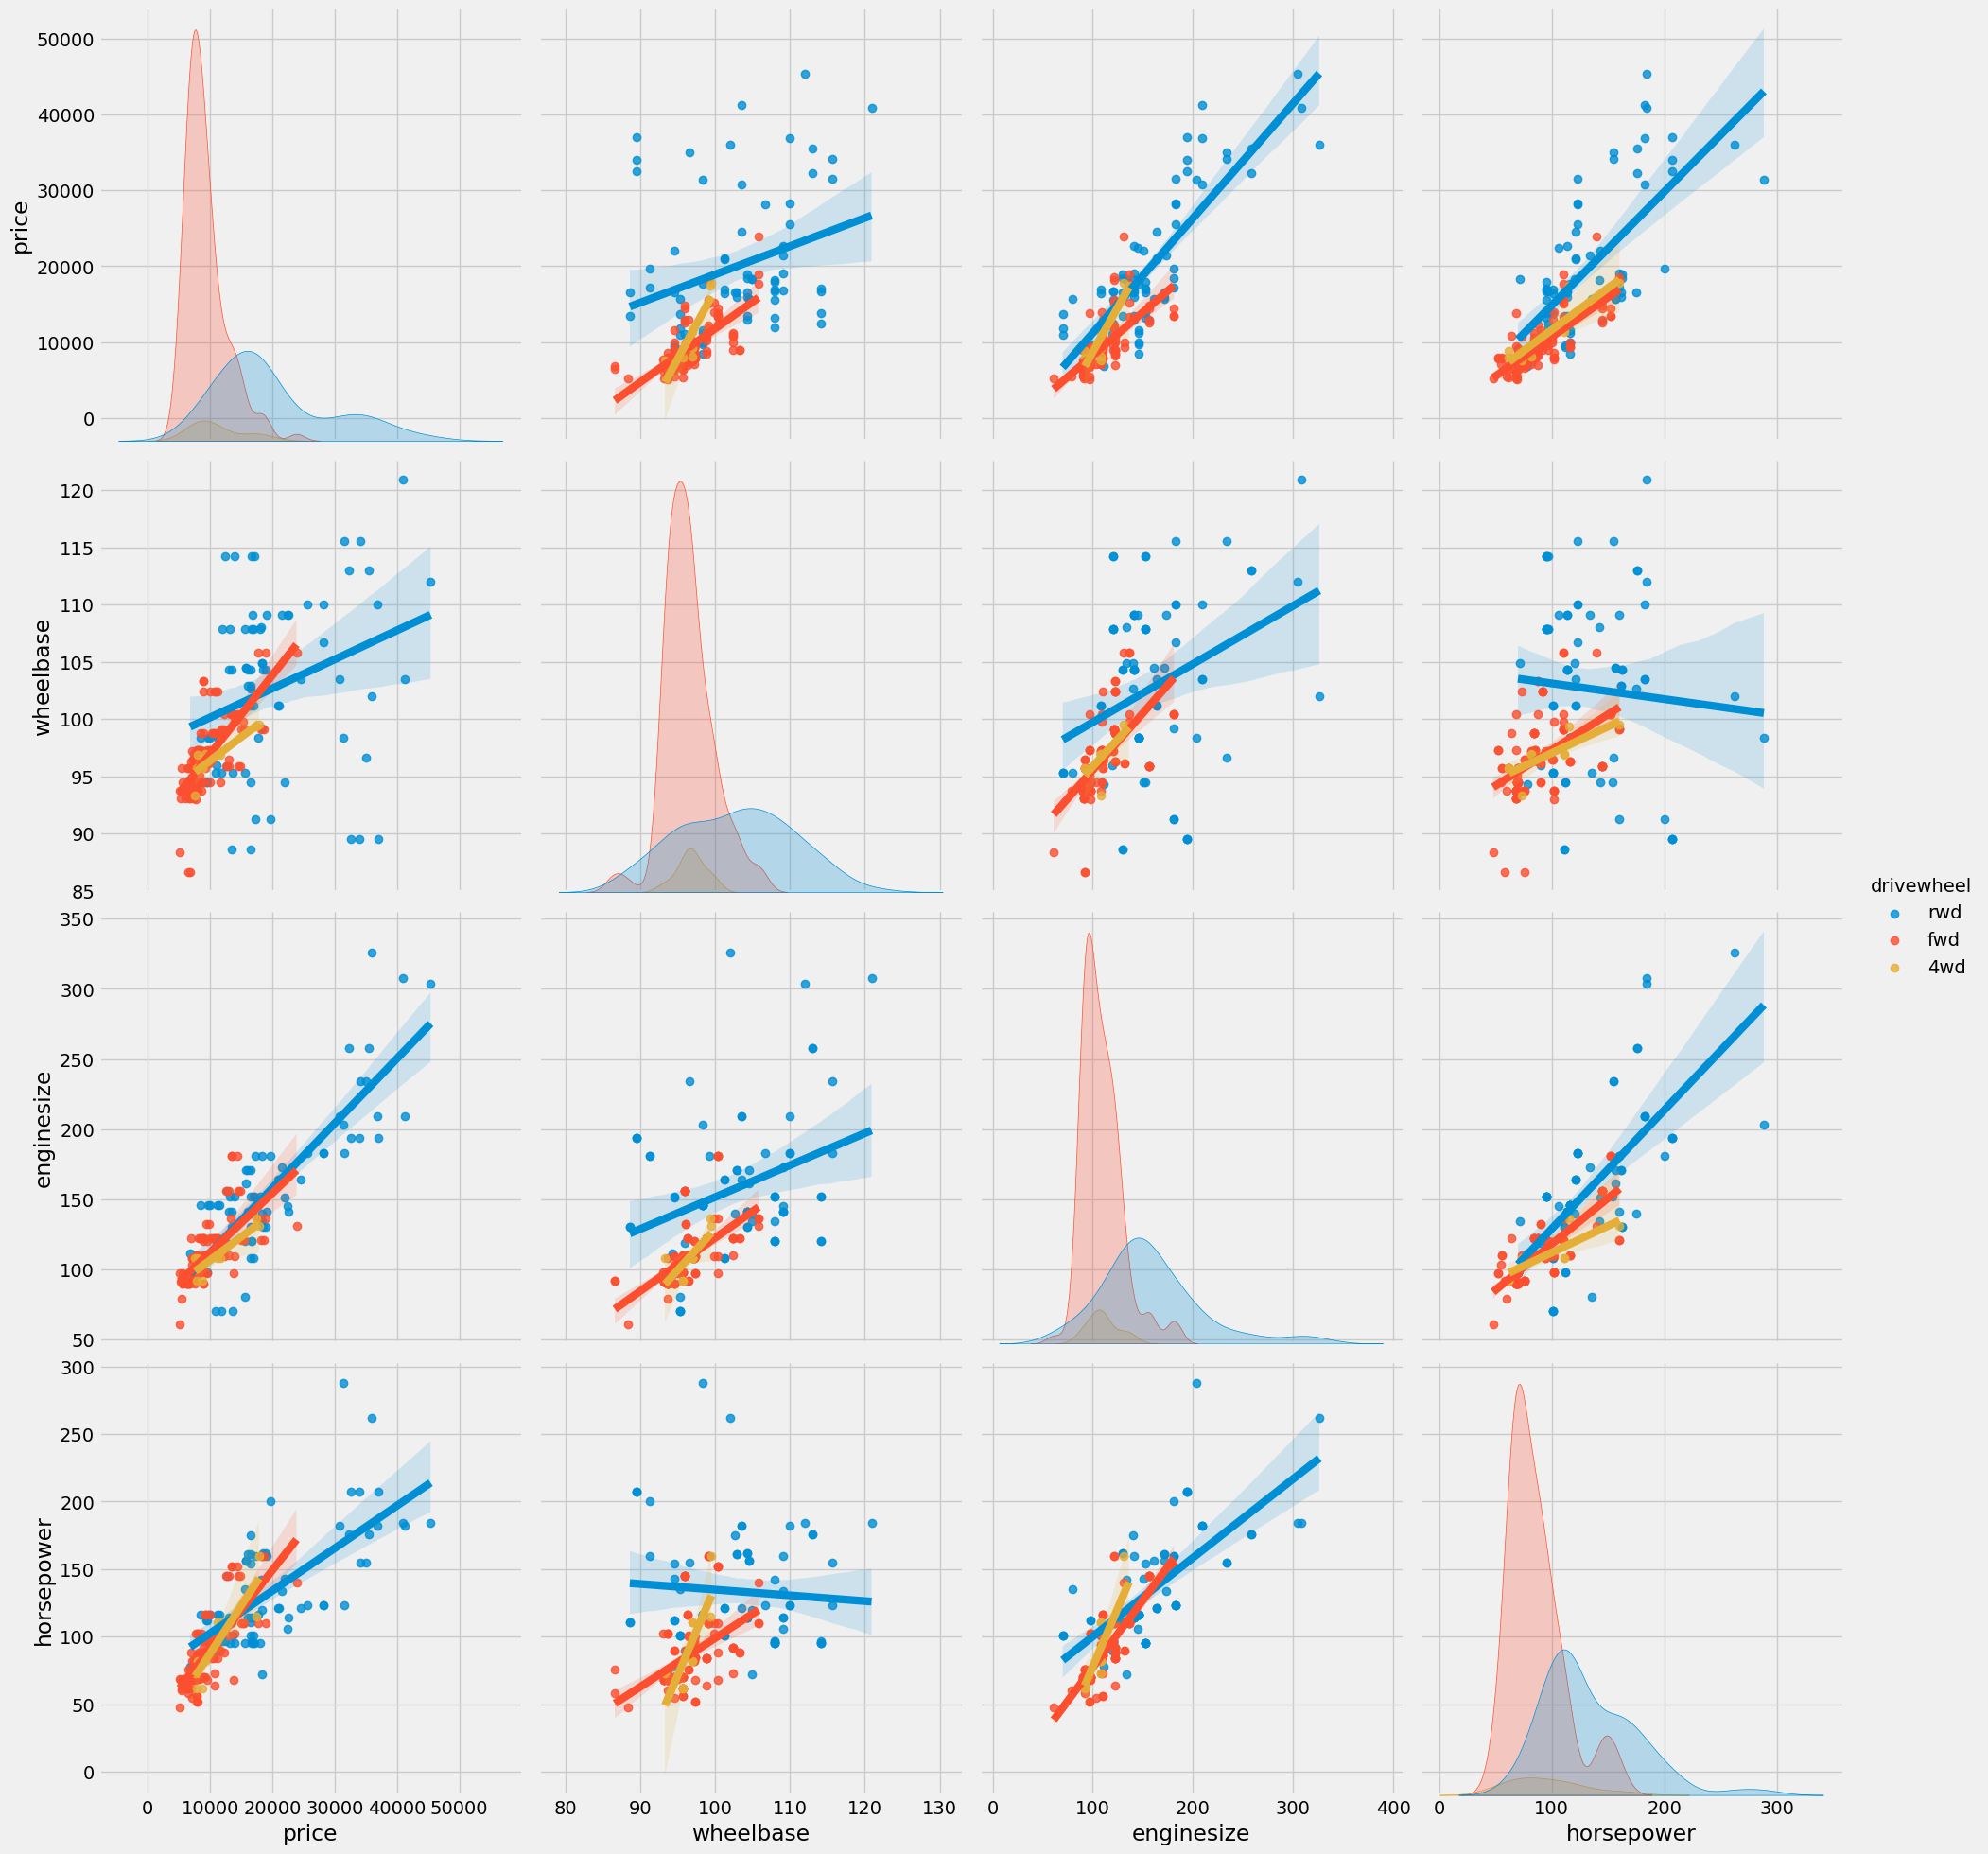

In [10]:
g = sns.pairplot(data[['price','wheelbase','enginesize','horsepower','drivewheel']],hue='drivewheel', height = 5, kind='reg')

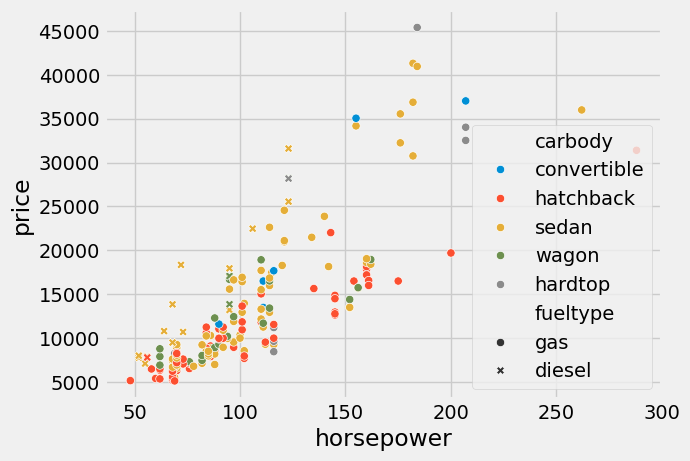

In [18]:
#Investigating the relationship between price and horsepower by carbody

ax = sns.scatterplot(x='horsepower', y='price',data=data, hue='carbody',style='fueltype')

### Investigating the categorical data

carbody         price
0  convertible  21890.500000
1      hardtop  22208.500000
2    hatchback  10376.652386
3        sedan  14344.270833
4        wagon  12371.960000

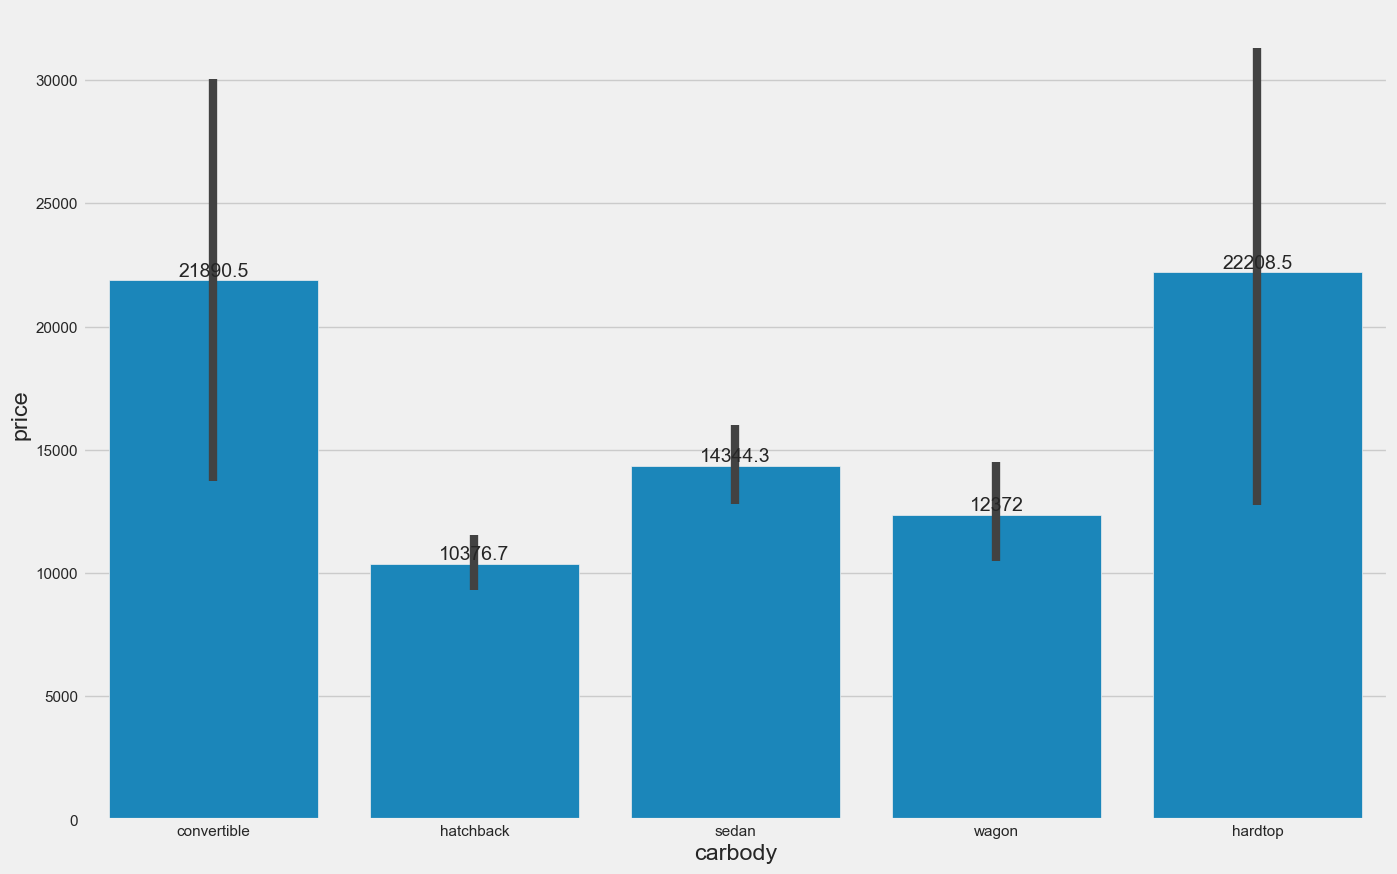

In [23]:
#Average price by carbody

ax = sns.barplot(x='carbody', y='price', data=data)
ax.bar_label(ax.containers[0])

#calculating the mean of each category
data[['carbody', 'price']].groupby('carbody', as_index=False).agg({'price':'mean'})

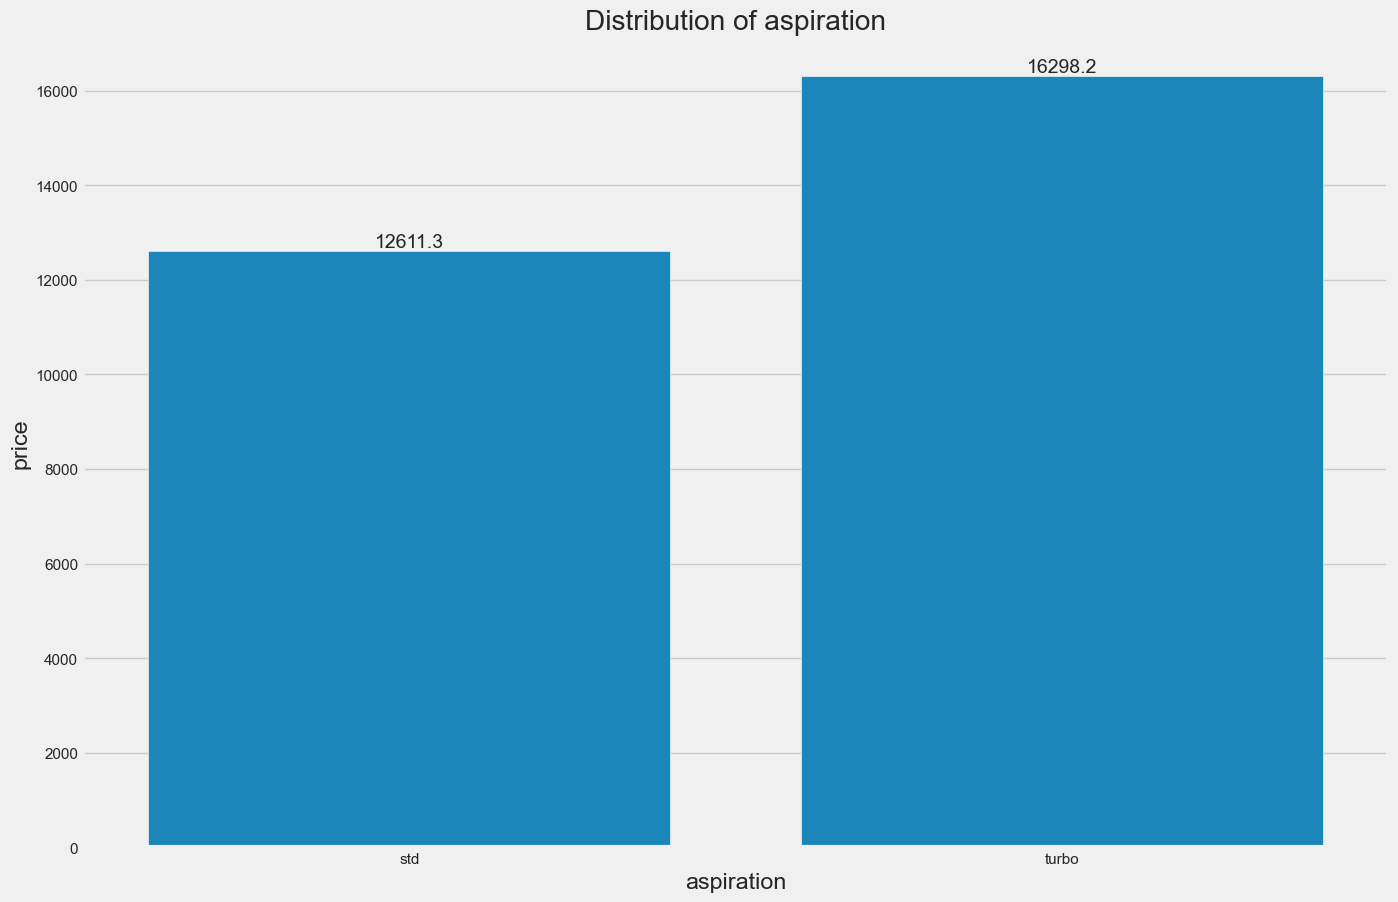

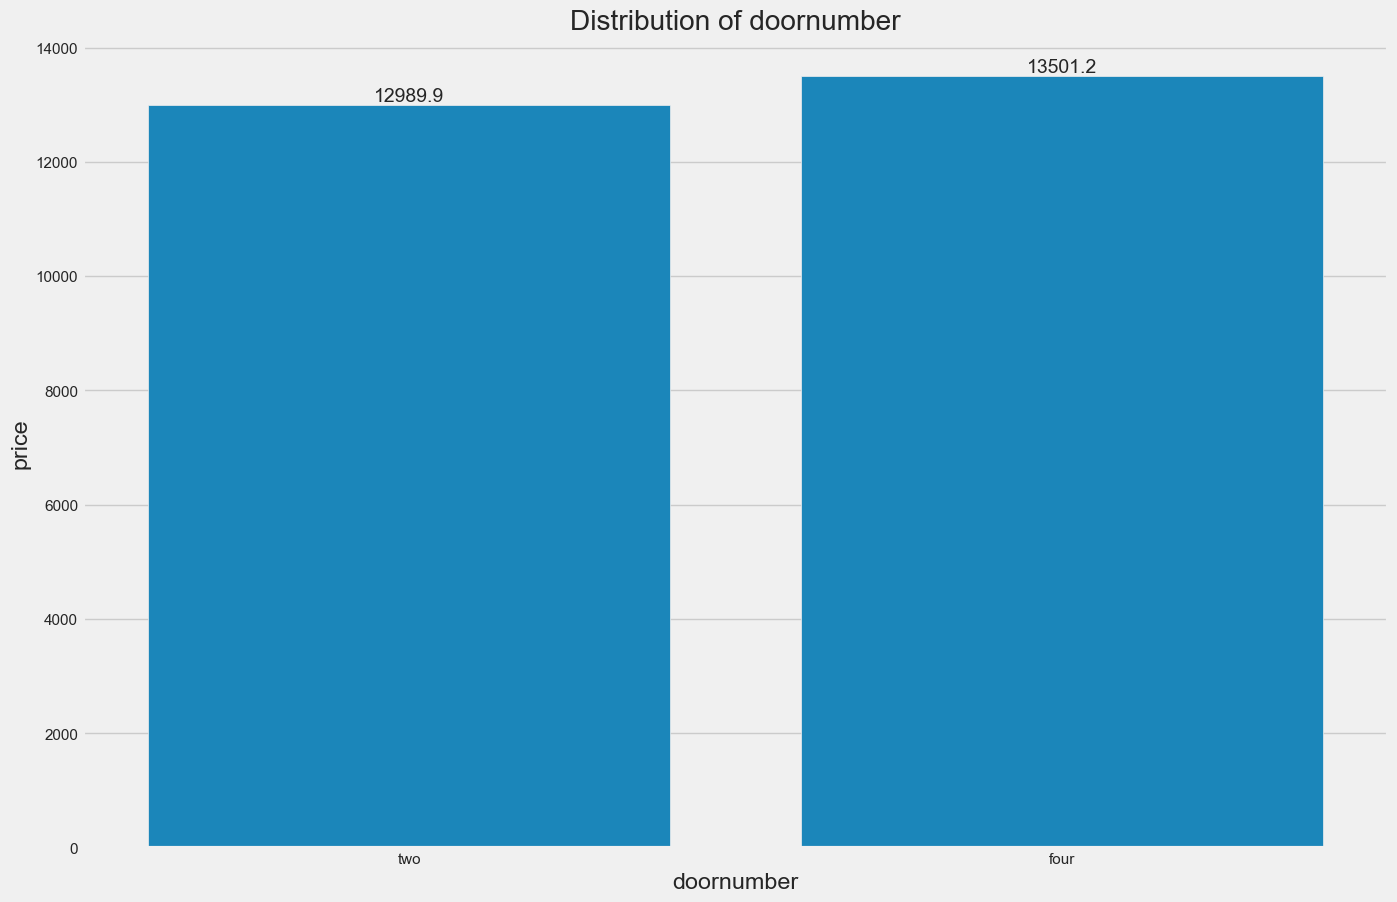

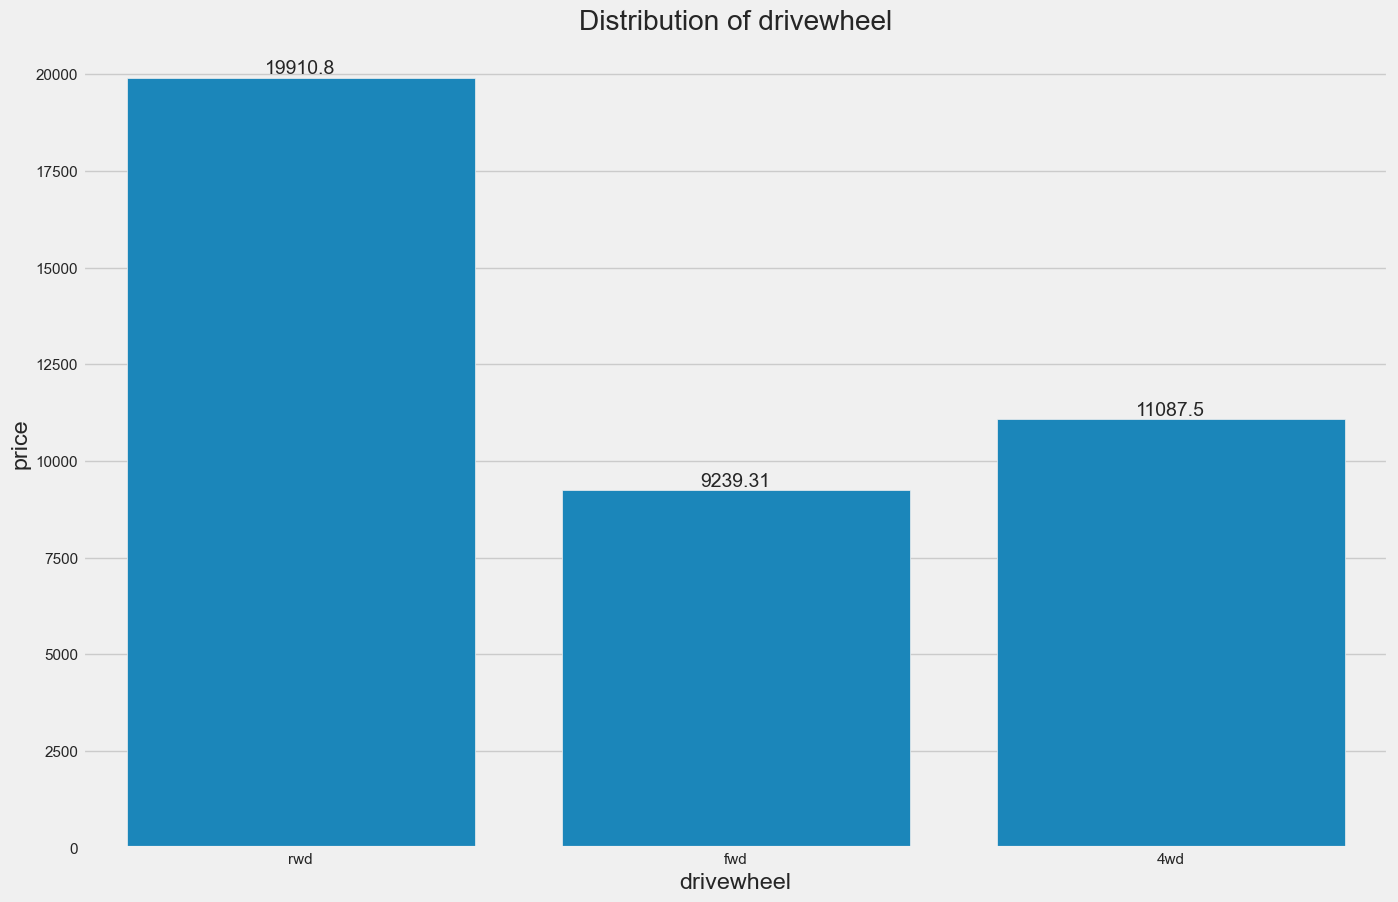

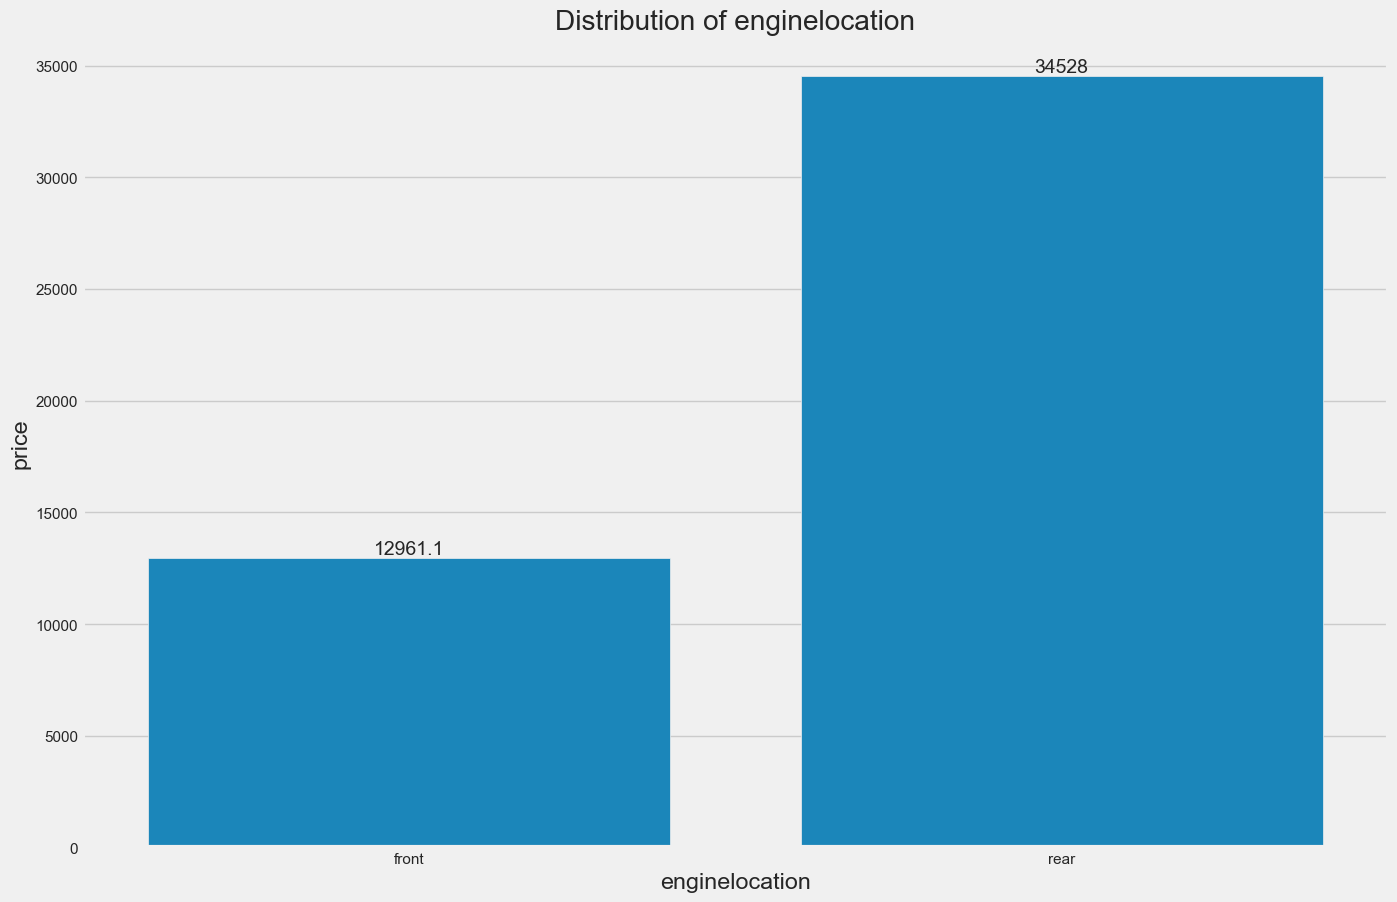

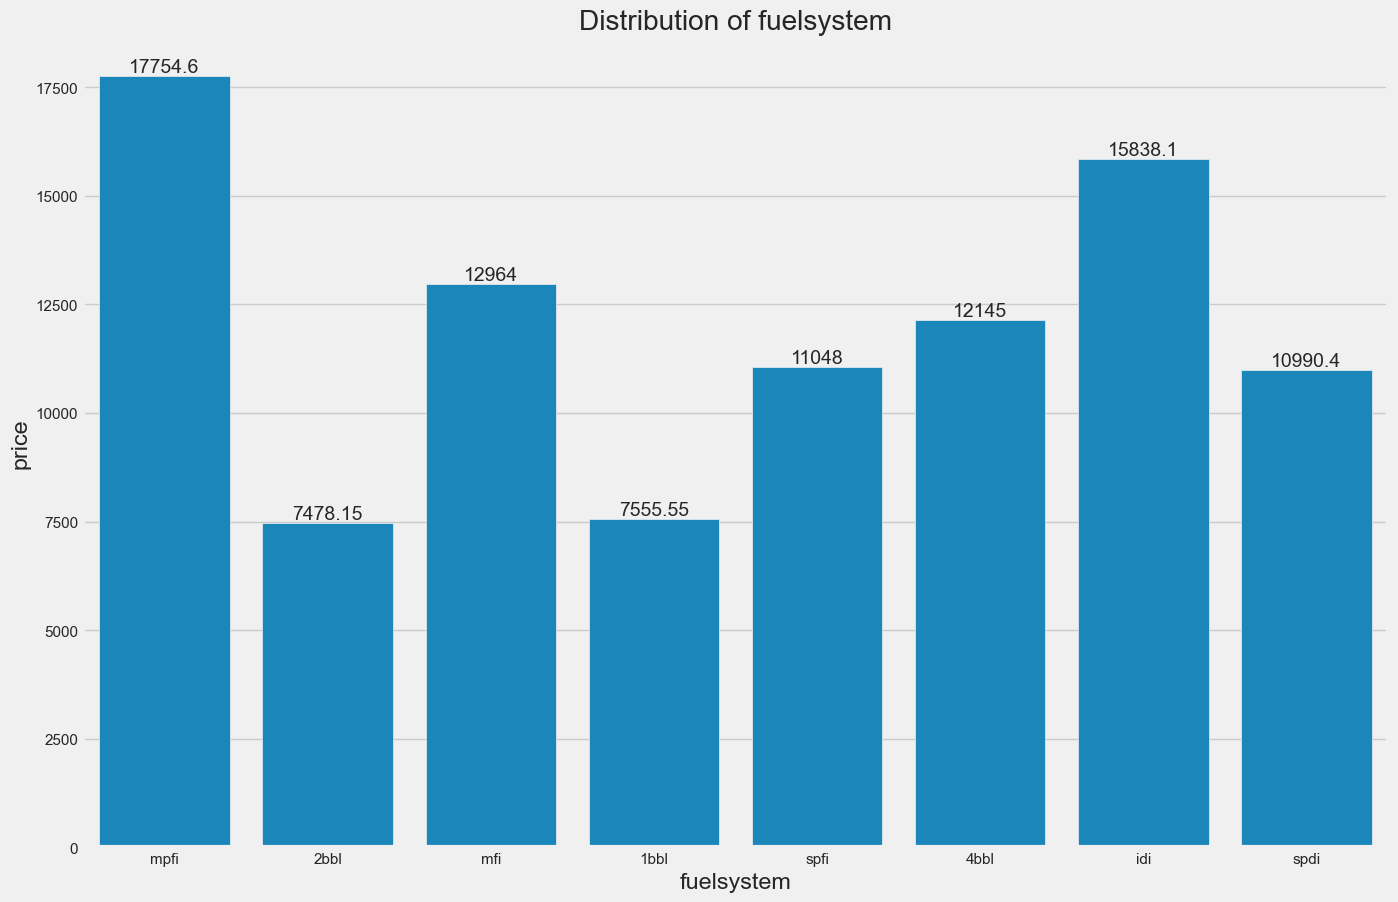

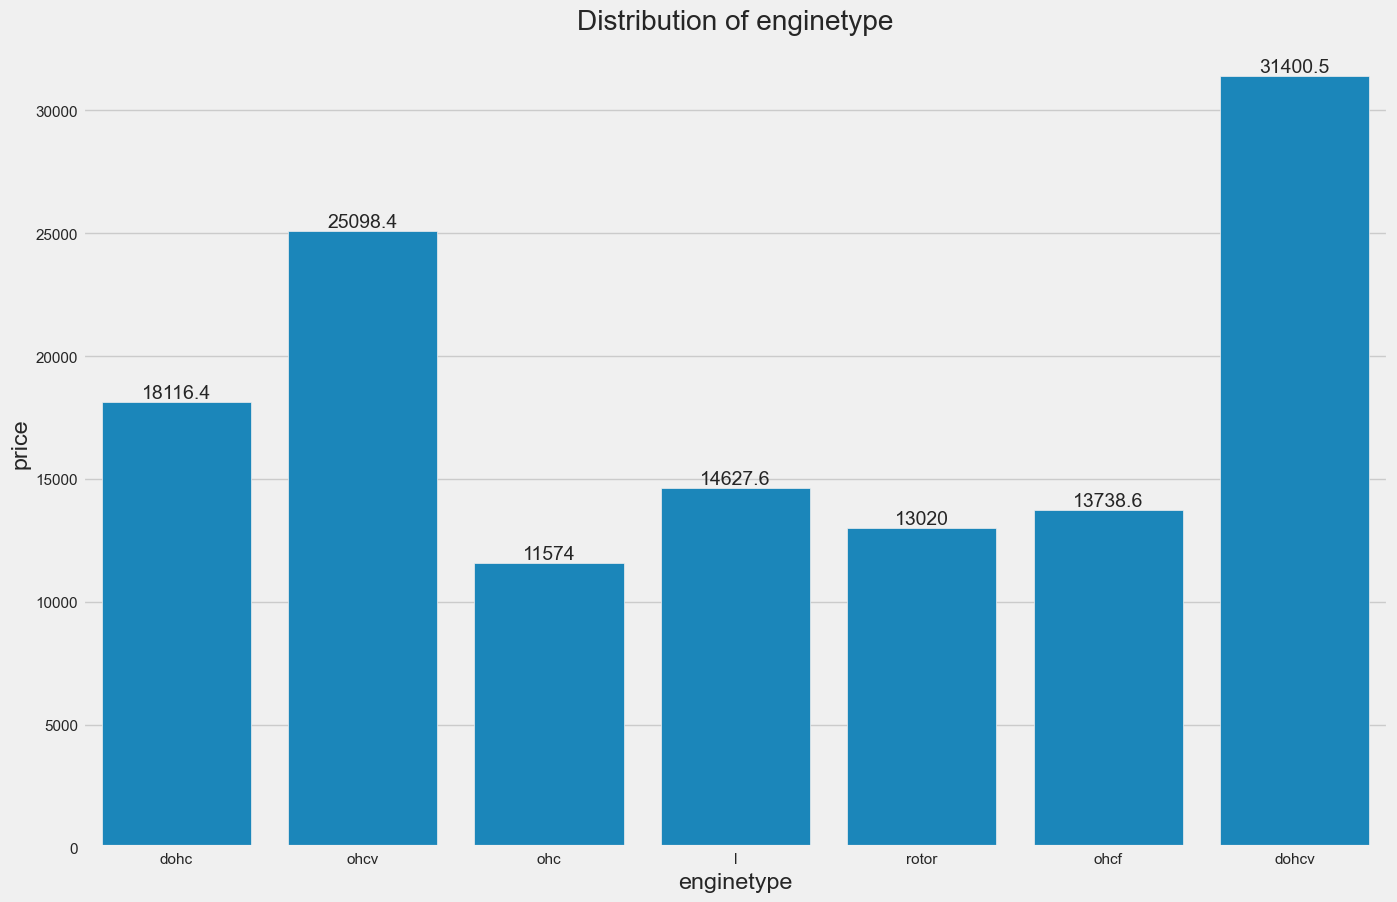

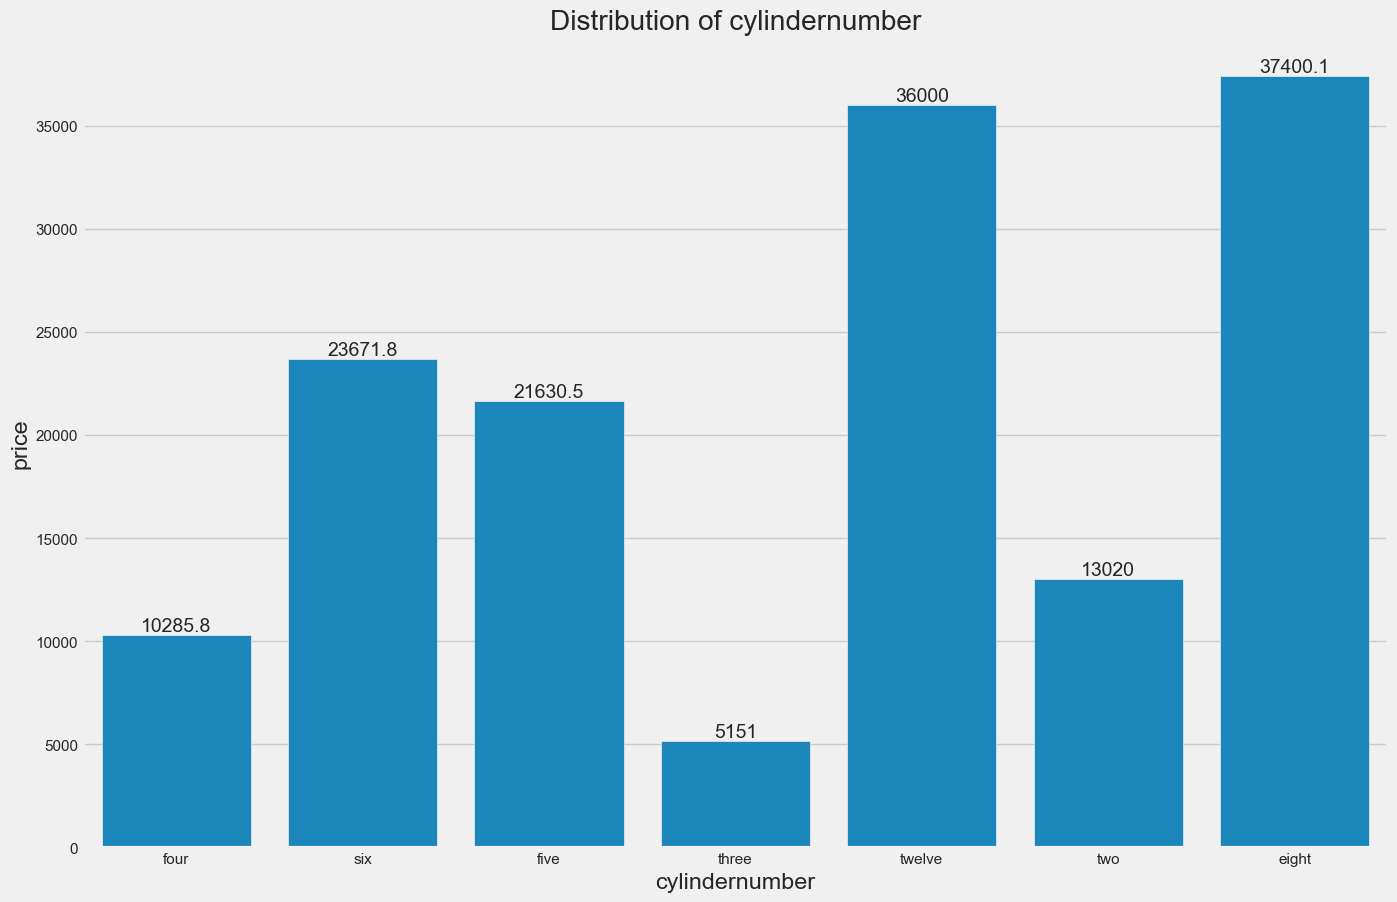

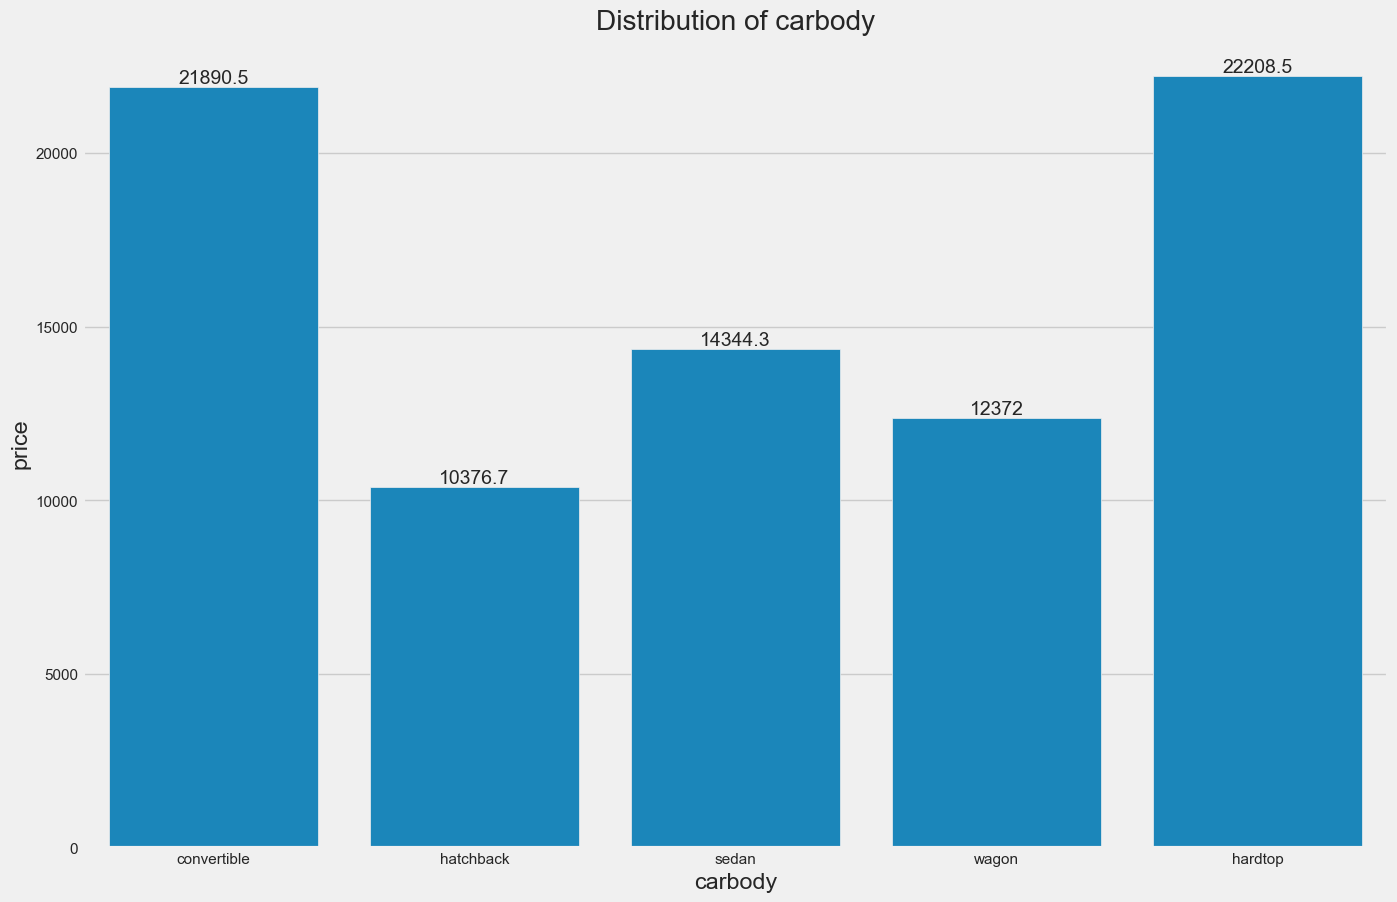

In [24]:
# Investigating the relationship between price and every other categorical variable
categories = ['aspiration','doornumber','drivewheel','enginelocation','fuelsystem','enginetype','cylindernumber','carbody']

for c in categories:
    ax = sns.barplot(x=c, y='price', data=data, errorbar=('ci', False))
    for container in ax.containers:
        ax.bar_label(container)
        plt.title(f'Distribution of {c}')
        plt.show()

    

### Investigating the distribution of the target variable

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\4067008957.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=True)


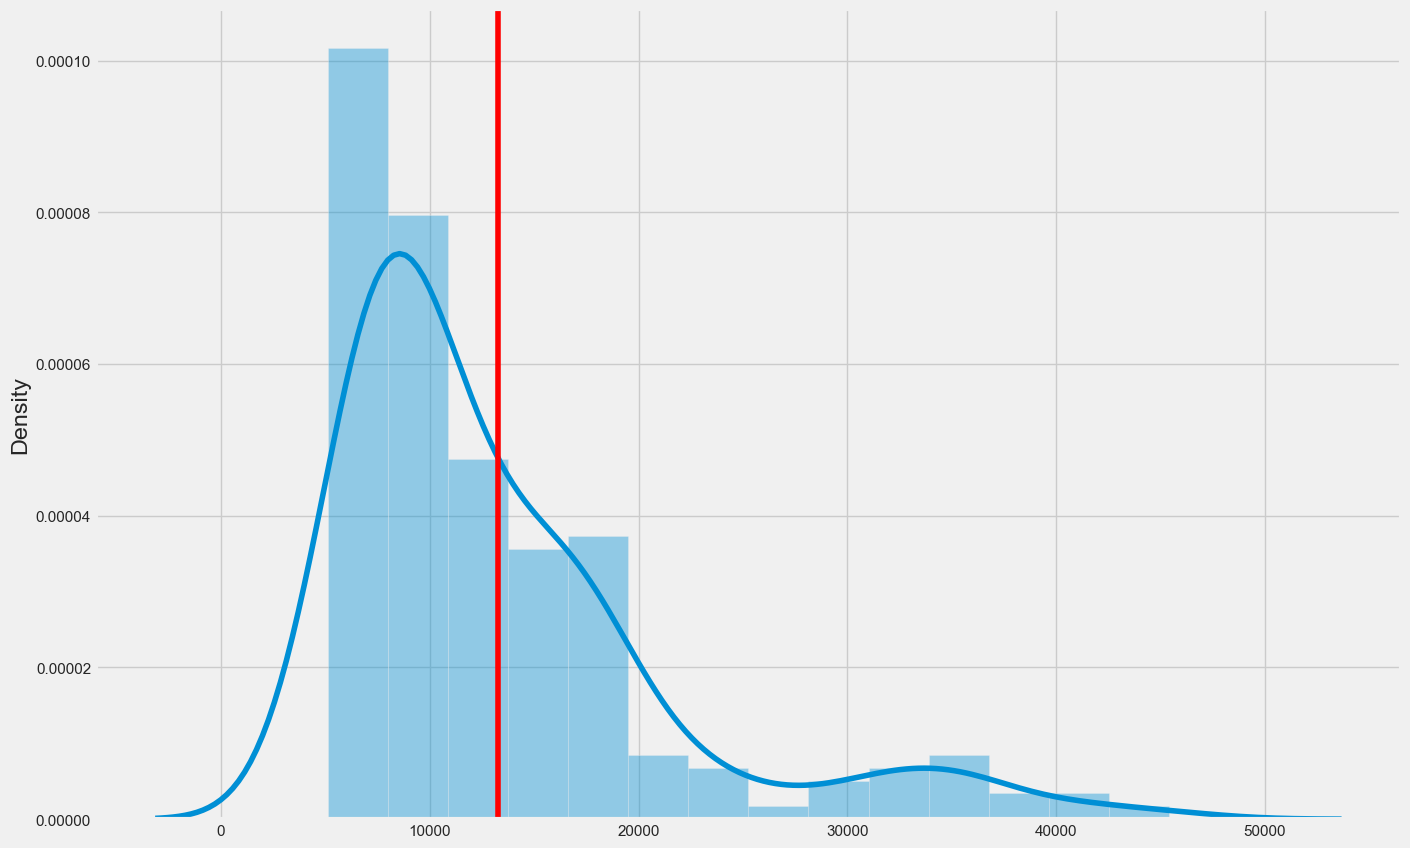

In [25]:
#Investigating the distribution of price

x = data['price'].values

sns.distplot(x, kde=True)

#Calculating the mean
mean = data['price'].mean()

#plotting the mean
plt.axvline(mean, 0,1, color='red')

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


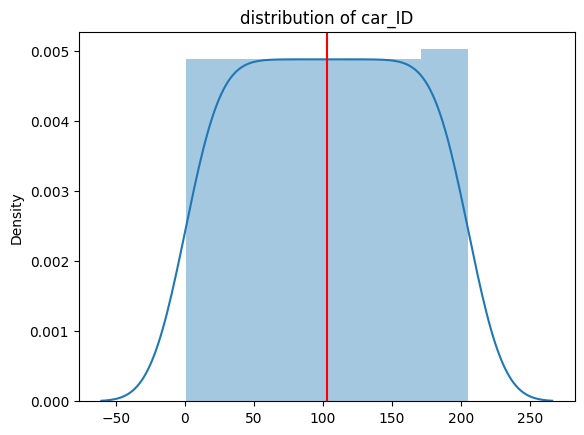

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


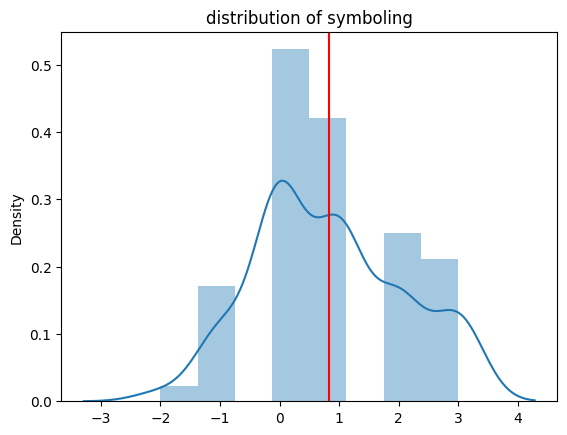

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


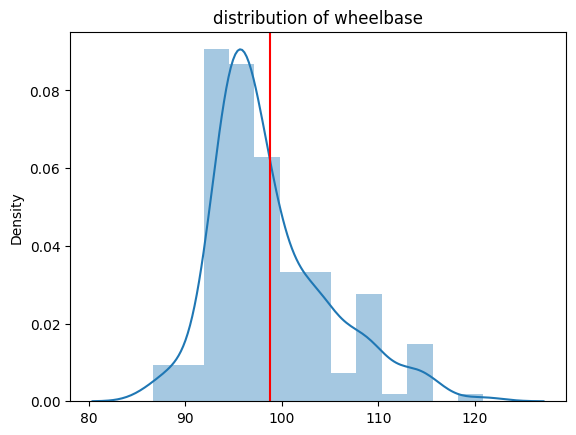

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


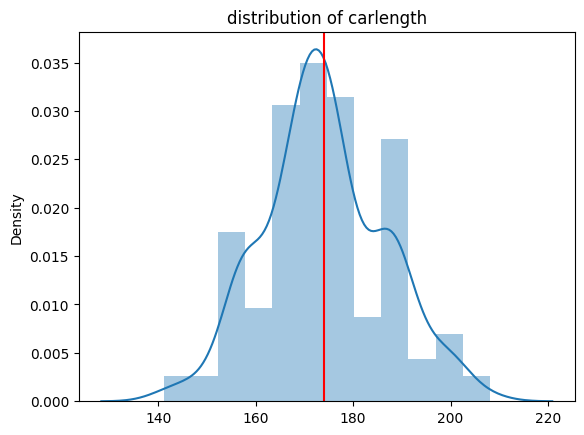

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


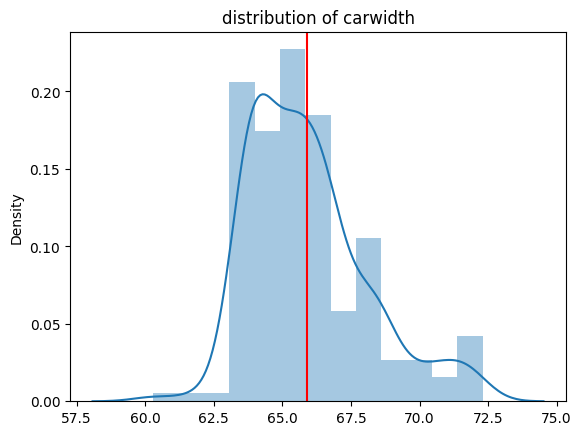

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


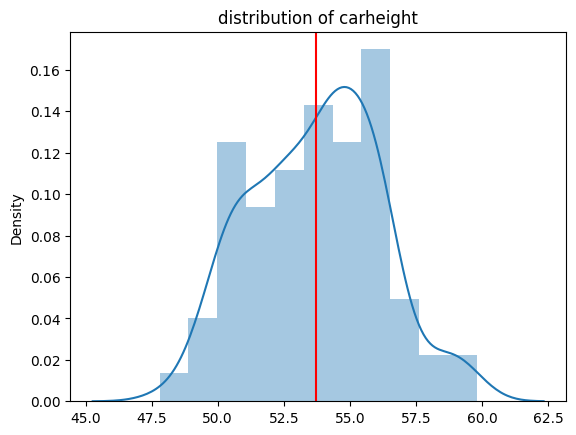

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


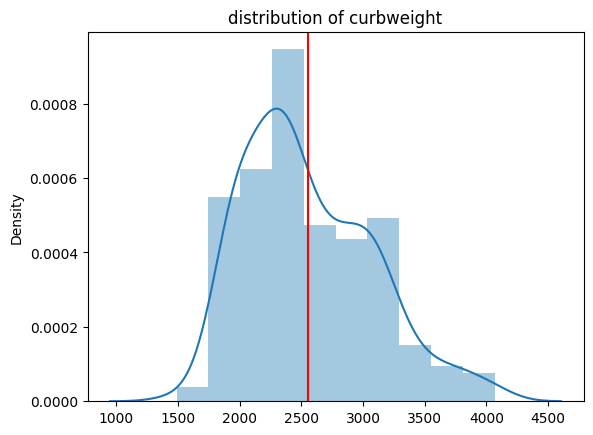

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


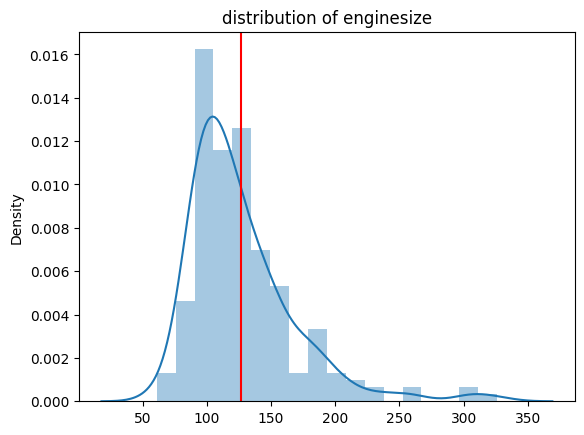

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


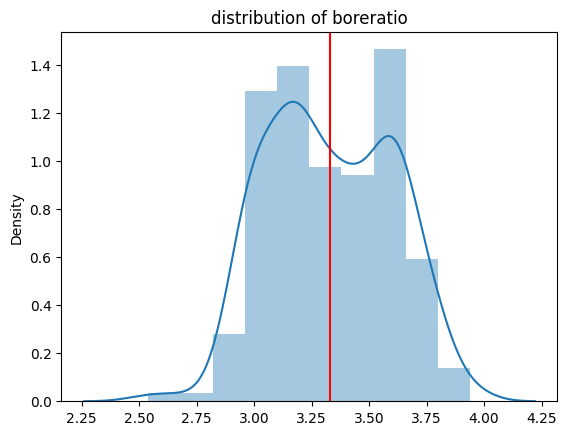

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


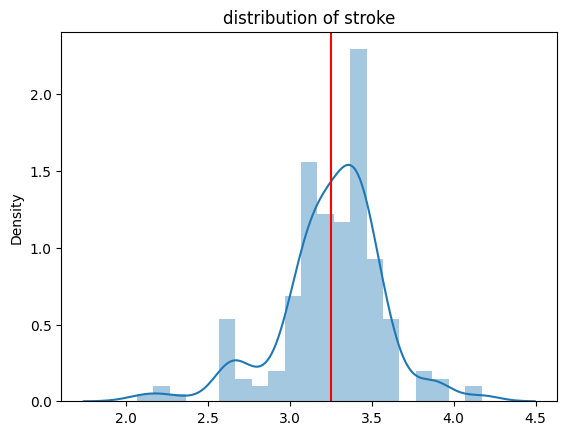

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


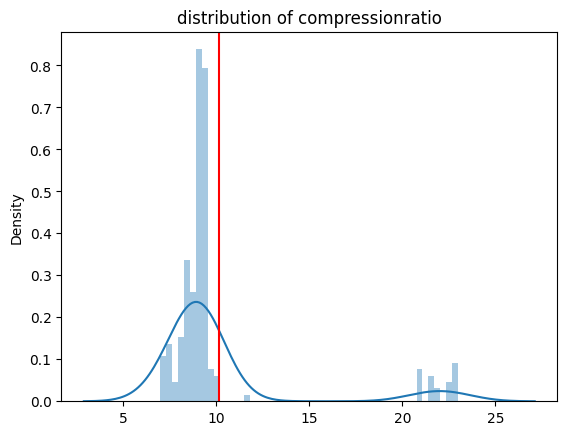

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


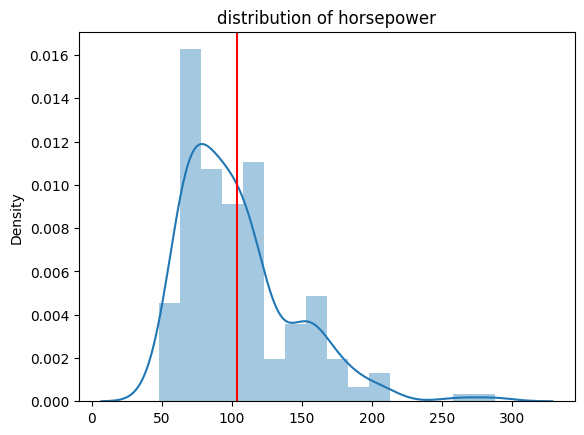

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


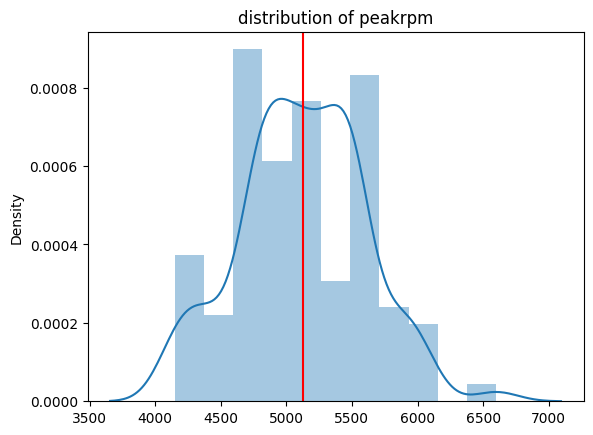

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


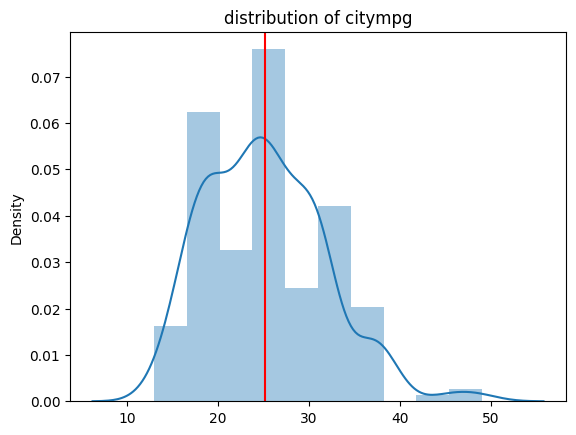

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


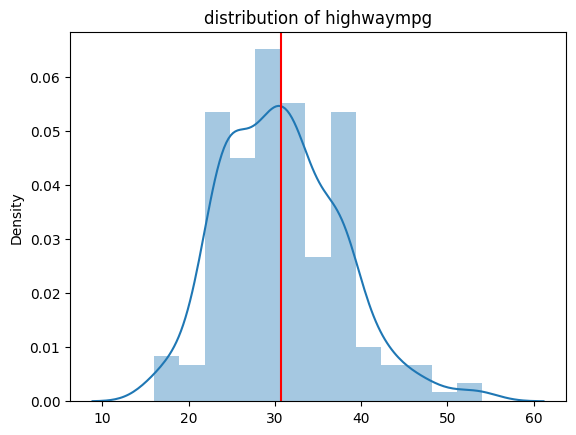

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\1563036164.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


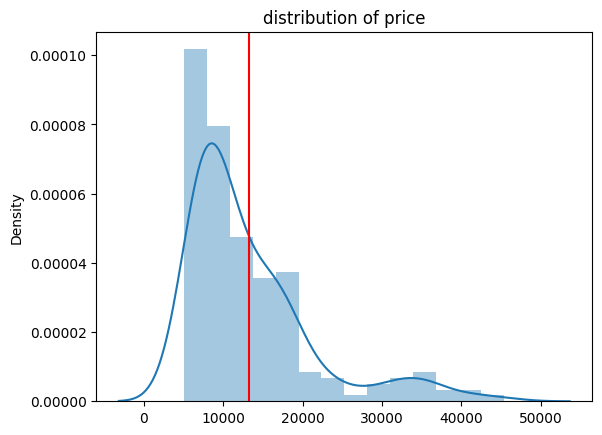

In [5]:
#Investigating the distribution of all numeric variables


n_variables = data.select_dtypes(include='number').columns

for n in n_variables:
    x = data[n].values
    sns.distplot(x)
    mean = data[n].mean()
    plt.axvline(mean,0,1, color='red')
    plt.title(f'distribution of {n}')
    plt.show()
    

- From the above distribution plots, all the numeric variables seem to follow a normal distribution with the distribution of price looking slightly skewed due to the price of some few expensive cars.But it is normal in general with most car prices falling between 10000 and 20000 dollars

### Investigating the distribution and outliers with Box plots

The median is:  10295.0


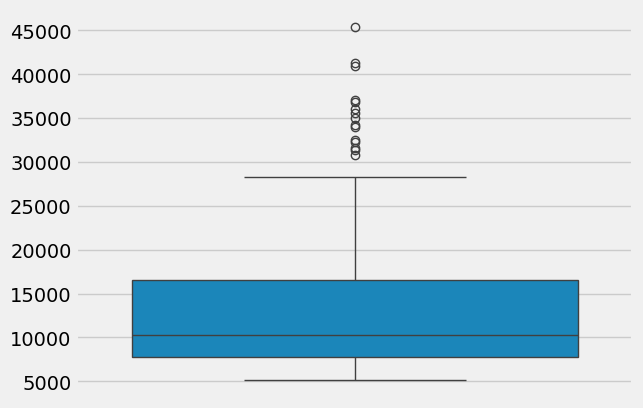

In [45]:
#Investigating the distribution of Price
x=data['price'].values
ax = sns.boxplot(x)

print('The median is: ', data['price'].median())

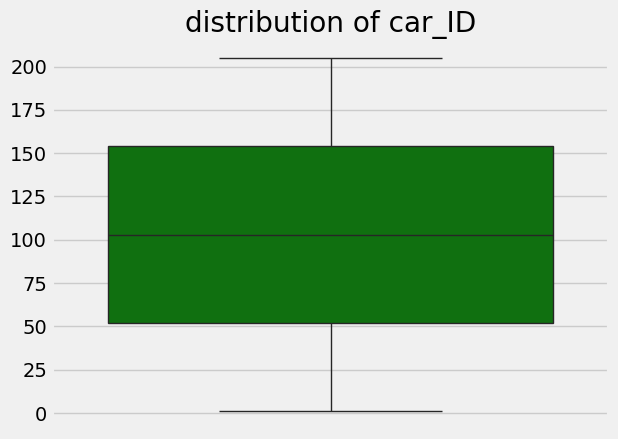

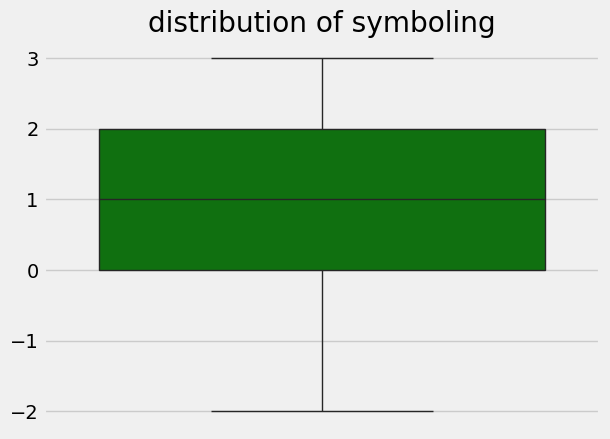

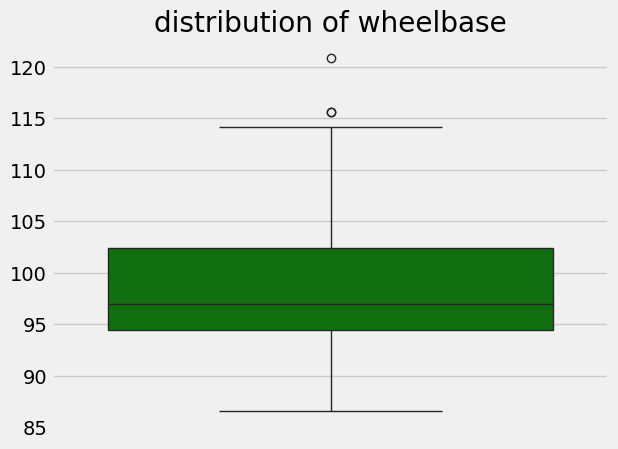

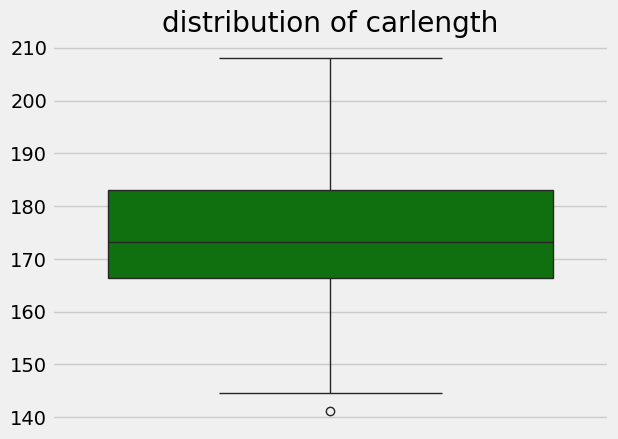

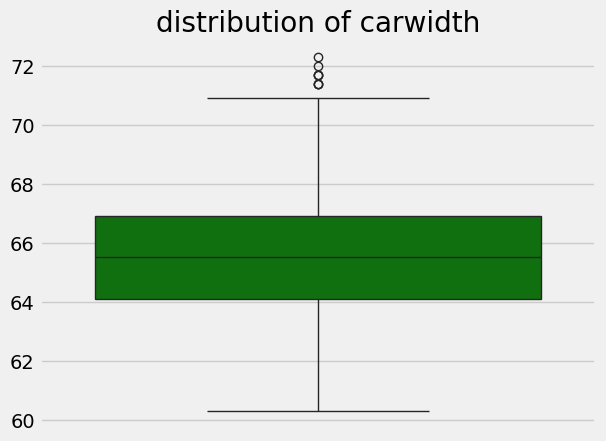

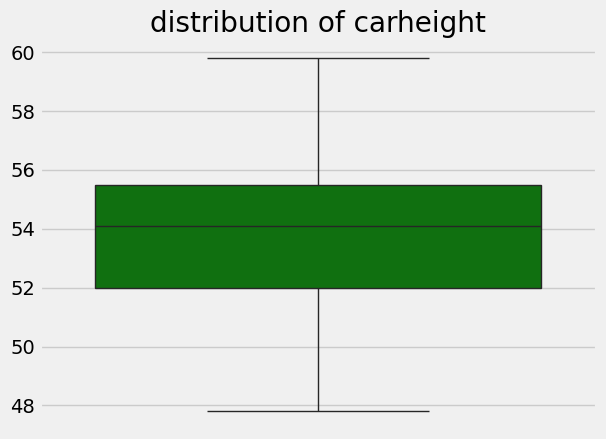

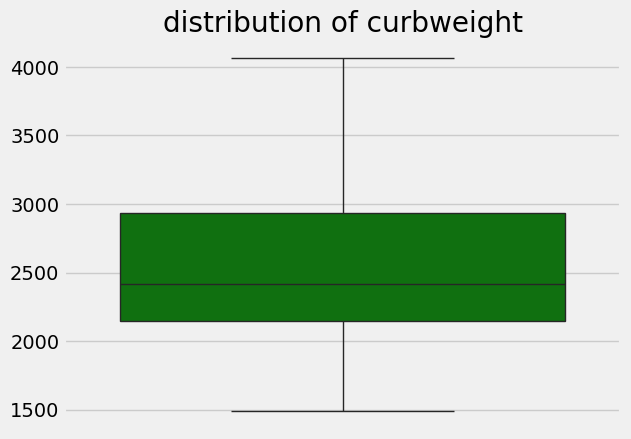

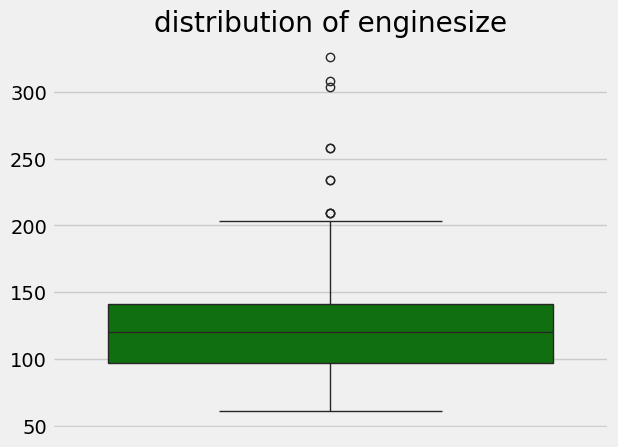

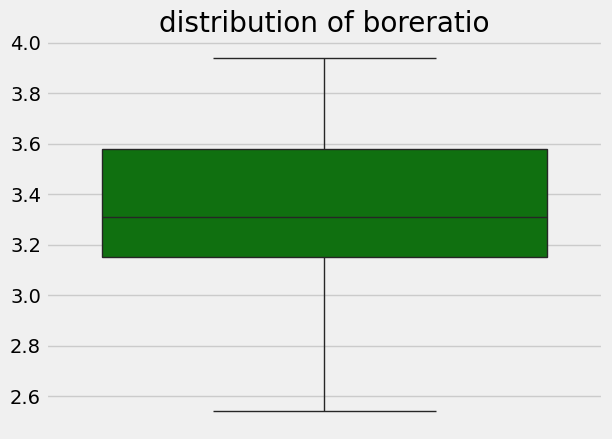

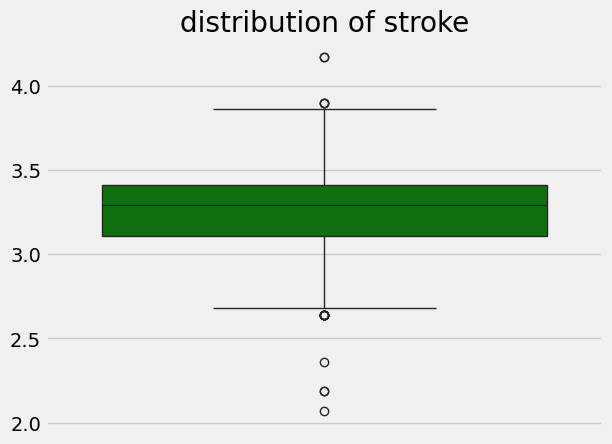

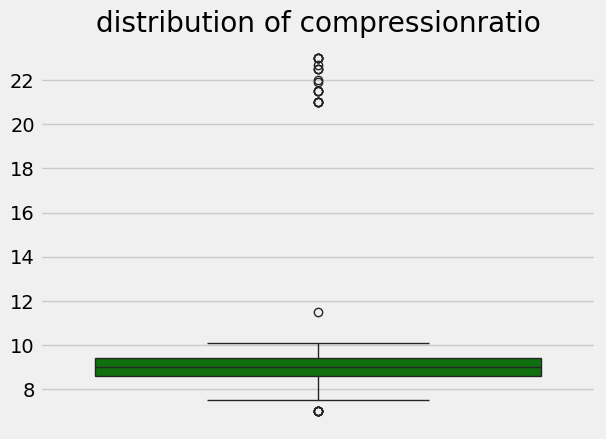

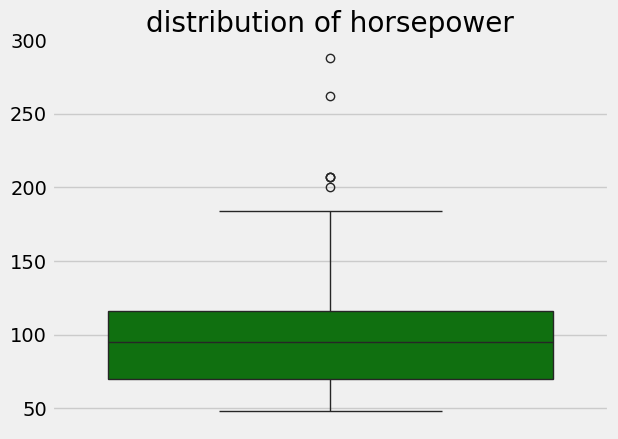

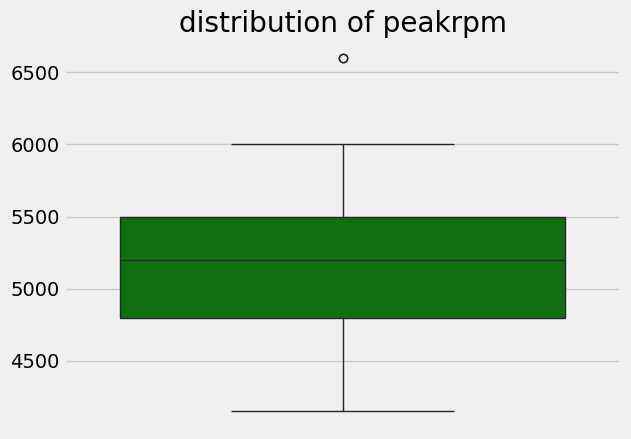

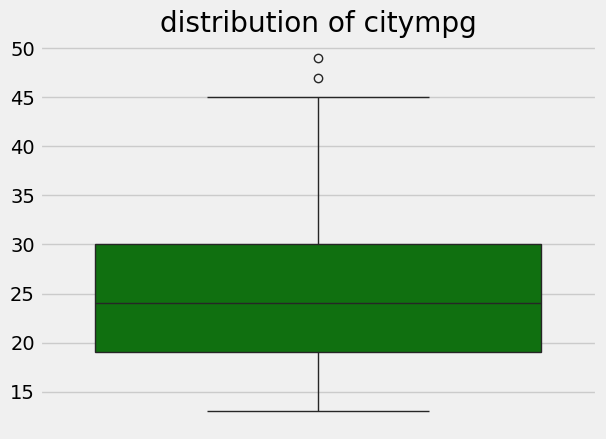

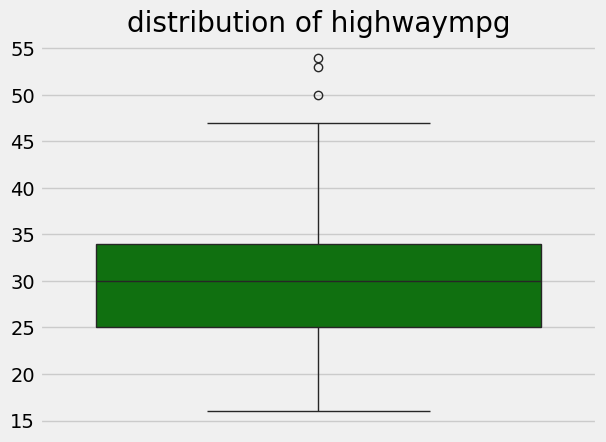

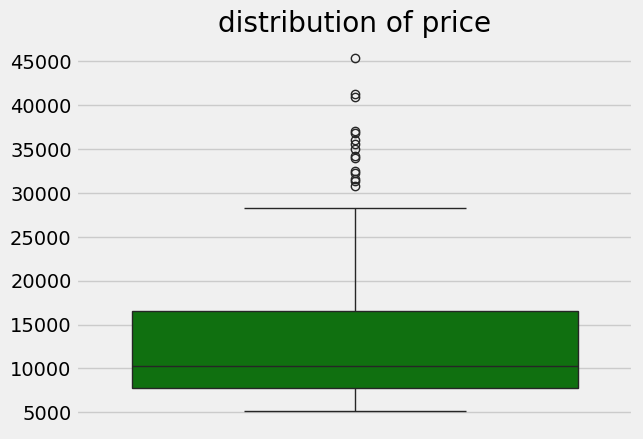

In [44]:
# Investigating outliers in all other numeric features

for n in n_variables:
    x = data[n].values
    sns.boxplot(x, color='green')
    mean = data[n].mean()
    plt.title(f'distribution of {n}')
    plt.show()

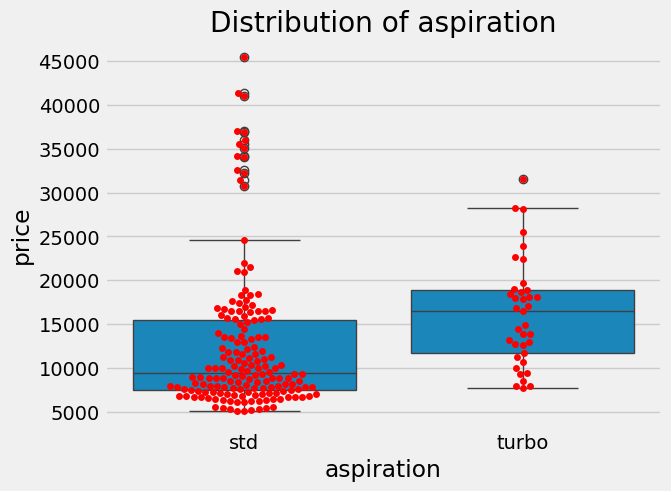

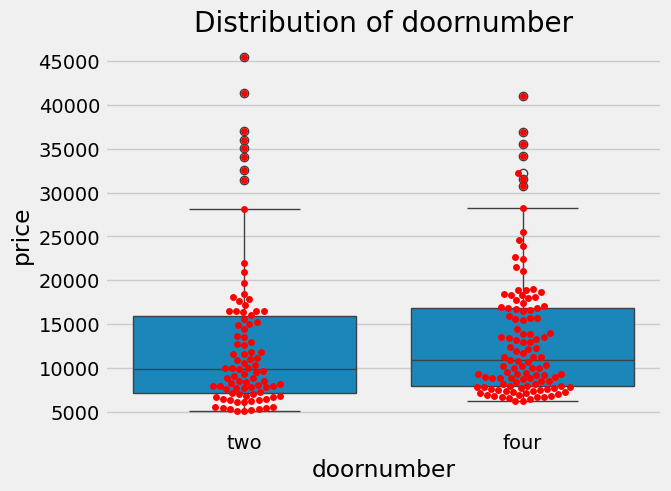

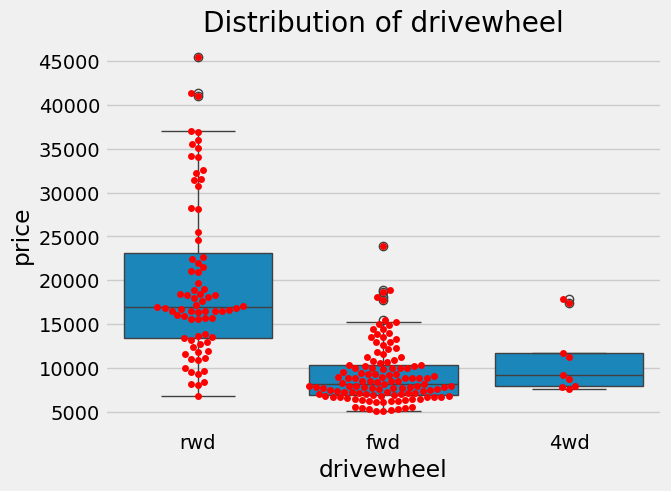

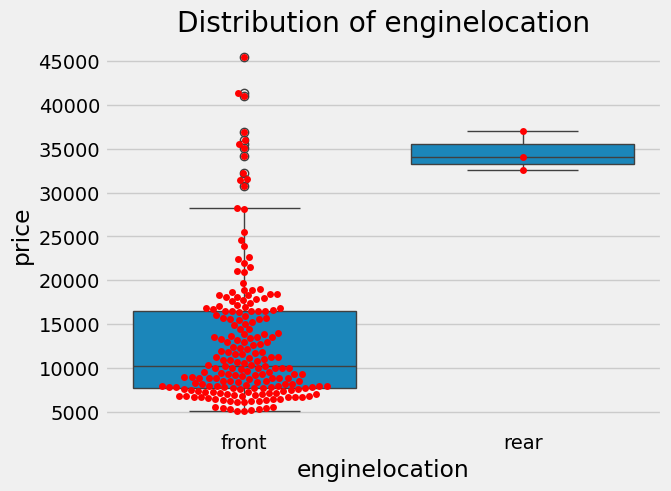

C:\Users\99Street\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\99Street\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


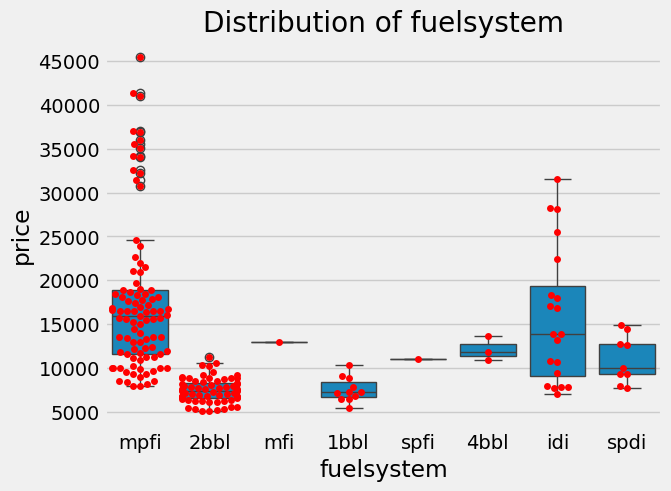

C:\Users\99Street\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\99Street\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


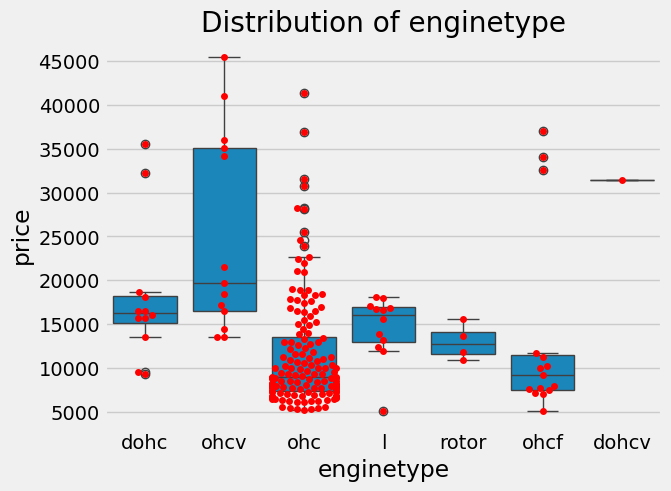

C:\Users\99Street\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\99Street\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


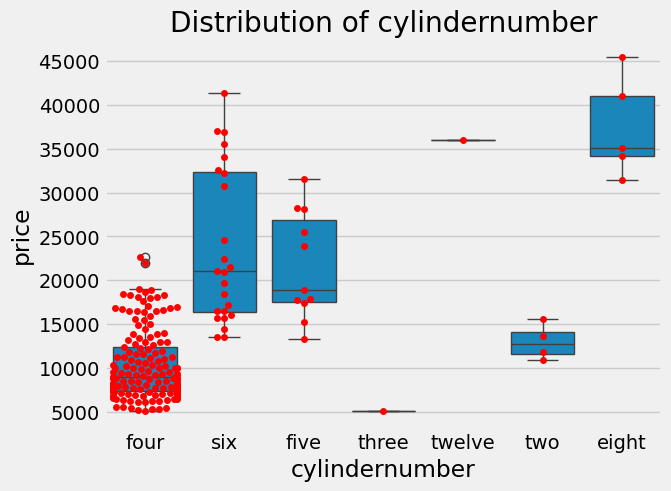

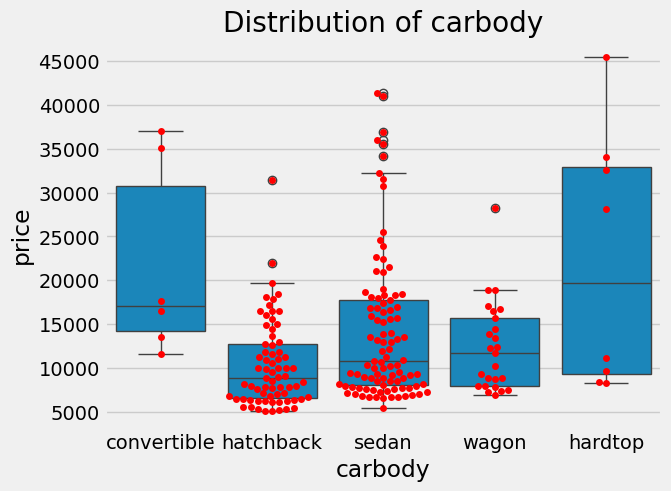

In [48]:
#Investigating the distribution by categorical variables - by data points
for c in categories:
    ax = sns.boxplot(x = c, y='price', data=data)
    ax = sns.swarmplot(x=c,y='price',data=data, color='red')
    plt.title(f'Distribution of {c}')
    plt.show()

### Converting the categorical values into numerical representation

In [41]:
new_data = pd.get_dummies(data, columns=['carbody','aspiration','doornumber','drivewheel','enginelocation','fuelsystem','enginetype','fueltype'])

In [42]:
data['CarName'].nunique()

147

In [43]:
bool_cols = new_data.select_dtypes(include='bool').columns
new_data[bool_cols] = new_data[bool_cols].astype(int)

In [44]:
new_data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [45]:
cylinder_map = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

In [46]:
new_data['cylindernumber'] = new_data['cylindernumber'].replace(cylinder_map).infer_objects(copy=False).astype(int)

C:\Users\99Street\AppData\Local\Temp\ipykernel_10504\3614692841.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data['cylindernumber'] = new_data['cylindernumber'].replace(cylinder_map).infer_objects(copy=False).astype(int)


In [32]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 195 entries, car_ID to CarName_vw rabbit
dtypes: float64(8), int64(187)
memory usage: 312.4 KB


In [47]:
new_data.head()

car_ID  symboling                   CarName  wheelbase  carlength  \
0       1          3        alfa-romero giulia       88.6      168.8   
1       2          3       alfa-romero stelvio       88.6      168.8   
2       3          1  alfa-romero Quadrifoglio       94.5      171.2   
3       4          2               audi 100 ls       99.8      176.6   
4       5          2                audi 100ls       99.4      176.6   

   carwidth  carheight  curbweight  cylindernumber  enginesize  ...  \
0      64.1       48.8        2548               4         130  ...   
1      64.1       48.8        2548               4         130  ...   
2      65.5       52.4        2823               6         152  ...   
3      66.2       54.3        2337               4         109  ...   
4      66.4       54.3        2824               5         136  ...   

   fuelsystem_spfi  enginetype_dohc  enginetype_dohcv  enginetype_l  \
0                0                1                 0             0   
1                0                1                 0             0   
2                0                0                 0             0   
3                0                0                 0             0   
4                0                0                 0             0   

   enginetype_ohc  enginetype_ohcf  enginetype_ohcv  enginetype_rotor  \
0               0                0                0                 0   
1               0                0                0                 0   
2               0                0                1                 0   
3               1                0                0                 0   
4               1                0                0                 0   

   fueltype_diesel  fueltype_gas  
0                0             1  
1                0             1  
2                0             1  
3                0             1  
4                0             1  

[5 rows x 49 columns]

### Selecting important Features

In [48]:
new_data.columns

Index(['car_ID', 'symboling', 'CarName', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fueltype_diesel', 'fueltype_gas'],
      dtype='object')

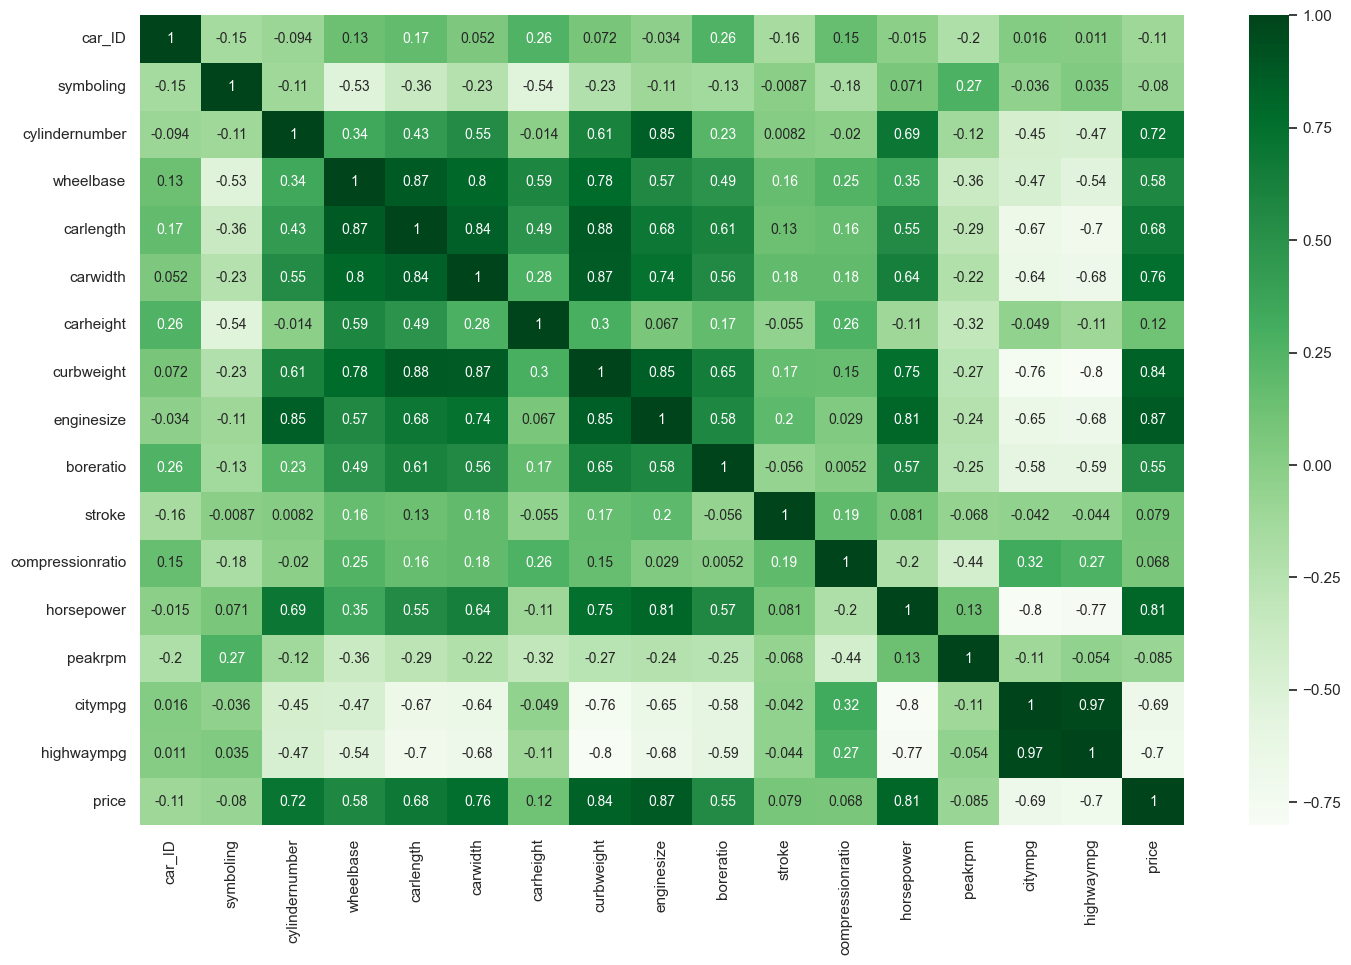

In [49]:
# Heatmap
#dropping columns we don't need
# del new_data['car_ID']

# del n_variables['car_ID']

#Pearson correlation
sns.set(rc={'figure.figsize': (15,10)})
pc = new_data[n_variables].corr(method='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True, yticklabels=cols,xticklabels=cols,annot_kws={'size':10}, cmap='Greens')

- Best Predictors for price according to the above heat map:
- cylindernumber
- wheelbase
- carlength
- carwidth
- curbweight
- enginesize
- boreratio
- horsepower

### Feature Importance

In [52]:
# Split the data into X & y
X = new_data.drop(['price','CarName'], axis=1).values
X_columns =  new_data.drop(['price'], axis=1)
y = new_data['price'].astype(int)


print(X.shape)
print(y.shape)

(205, 47)
(205,)


In [53]:
##### Run a Tree-based classifier (i.e decision trees & random forests)

dt = DecisionTreeClassifier(random_state =15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [54]:
dt.feature_importances_

array([0.067097, 0.008362, 0.106282, 0.057973, 0.039068, 0.110696,
       0.241150, 0.001786, 0.053168, 0.004961, 0.016314, 0.008851,
       0.094566, 0.014268, 0.014436, 0.048669, 0.000000, 0.005677,
       0.011418, 0.001297, 0.009659, 0.001297, 0.012283, 0.017902,
       0.006655, 0.000000, 0.009690, 0.003890, 0.003890, 0.000000,
       0.000000, 0.004934, 0.000000, 0.008393, 0.000000, 0.003083,
       0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.009690,
       0.000000, 0.000000, 0.000000, 0.000000, 0.002594])

In [55]:
#Calculating FI
final_fi = []

for i, column in enumerate(new_data.drop(['price','car_ID','CarName'], axis=1)):
    print(f'Importance of feature {column}:, {dt.feature_importances_[i]:.3f}')

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi,fi], ignore_index=True)
    except:
        final_fi = fi


# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi

Importance of feature symboling:, 0.067
Importance of feature wheelbase:, 0.008
Importance of feature carlength:, 0.106
Importance of feature carwidth:, 0.058
Importance of feature carheight:, 0.039
Importance of feature curbweight:, 0.111
Importance of feature cylindernumber:, 0.241
Importance of feature enginesize:, 0.002
Importance of feature boreratio:, 0.053
Importance of feature stroke:, 0.005
Importance of feature compressionratio:, 0.016
Importance of feature horsepower:, 0.009
Importance of feature peakrpm:, 0.095
Importance of feature citympg:, 0.014
Importance of feature highwaympg:, 0.014
Importance of feature carbody_convertible:, 0.049
Importance of feature carbody_hardtop:, 0.000
Importance of feature carbody_hatchback:, 0.006
Importance of feature carbody_sedan:, 0.011
Importance of feature carbody_wagon:, 0.001
Importance of feature aspiration_std:, 0.010
Importance of feature aspiration_turbo:, 0.001
Importance of feature doornumber_four:, 0.012
Importance of feature 

index              Variable  Feature Importance Score
0       6        cylindernumber                  0.241150
1       5            curbweight                  0.110696
2       2             carlength                  0.106282
3      12               peakrpm                  0.094566
4       0             symboling                  0.067097
5       3              carwidth                  0.057973
6       8             boreratio                  0.053168
7      15   carbody_convertible                  0.048669
8       4             carheight                  0.039068
9      23        doornumber_two                  0.017902
10     10      compressionratio                  0.016314
11     14            highwaympg                  0.014436
12     13               citympg                  0.014268
13     22       doornumber_four                  0.012283
14     18         carbody_sedan                  0.011418
15     26        drivewheel_rwd                  0.009690
16     41       enginetype_ohcf                  0.009690
17     20        aspiration_std                  0.009659
18     11            horsepower                  0.008851
19     33        fuelsystem_mfi                  0.008393
20      1             wheelbase                  0.008362
21     24        drivewheel_4wd                  0.006655
22     17     carbody_hatchback                  0.005677
23      9                stroke                  0.004961
24     31       fuelsystem_4bbl                  0.004934
25     27  enginelocation_front                  0.003890
26     28   enginelocation_rear                  0.003890
27     35       fuelsystem_spdi                  0.003083
28      7            enginesize                  0.001786
29     19         carbody_wagon                  0.001297
30     21      aspiration_turbo                  0.001297
31     29       fuelsystem_1bbl                  0.000000
32     16       carbody_hardtop                  0.000000
33     25        drivewheel_fwd                  0.000000
34     32        fuelsystem_idi                  0.000000
35     34       fuelsystem_mpfi                  0.000000
36     36       fuelsystem_spfi                  0.000000
37     30       fuelsystem_2bbl                  0.000000
38     37       enginetype_dohc                  0.000000
39     38      enginetype_dohcv                  0.000000
40     39          enginetype_l                  0.000000
41     40        enginetype_ohc                  0.000000
42     42       enginetype_ohcv                  0.000000
43     43      enginetype_rotor                  0.000000
44     44       fueltype_diesel                  0.000000
45     45          fueltype_gas                  0.000000

### Splitting the Raw Data

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 47)
(41, 47)
(164,)
(41,)


### Running Linear Regression

In [82]:
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = lm.predict(X_train)

In [84]:
#Model Accuracy om training dataset

print('The Accuracy on the training dataset is: ', lm.score(X_train, y_train))
print('The Accuracy r2 on the training dataset prediction is: ', r2_score(y_train, y_pred))

print('..')
# Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', lm.score(X_test, y_test))


print('...')
# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, lm.predict(X_test))))

print('...')
# The Mean Absolute Error
print('The MAE on the training dataset is:', mean_absolute_error(y_train,y_pred))
print('The MAE on the testing dataset is:', mean_absolute_error(y_test,lm.predict(X_test)))

print('...')
#Coefficients
print('Coefficients: ',lm.coef_)


print('...')
print('Intercept: ', lm.intercept_)

The Accuracy on the training dataset is:  0.9491670872030129
The Accuracy r2 on the training dataset prediction is:  0.9491670872030129
..
The Accuracy on the testing dataset is:  0.8503903986908412
...
The RMSE on the training dataset is:  1741.1377568254802
The RMSE on the testing dataset is:  3436.683699987892
...
The MAE on the training dataset is: 1293.65157123881
The MAE on the testing dataset is: 2141.792986937067
...
Coefficients:  [-15.132030 309.576693 162.501168 -74.597065 773.299543 301.509899
 4.425673 452.946770 114.550108 -1141.981215 -3622.741854 -694.942285
 -39.471225 1.919792 -62.161060 117.938636 2627.743490 -88.175317
 -481.133252 -24.404877 -2034.030044 -1319.780516 1319.780516 385.190811
 -385.190811 -704.440699 -625.093626 1329.534325 -7469.392580 7469.392580
 8.249743 397.596316 -1176.243103 3161.749218 -1930.659204 1360.797827
 -691.219913 -1130.270884 -1206.219136 6011.151462 -7383.110594
 -568.378288 -1391.259151 -3464.084736 8001.900444 3161.749218
 -3161.7

- The RMSE on the testing dataset indicates that in future predictions the model is likely to deviate by 3436.683699987892 dollars on the actual price
- WE have to minize this value as much as possible

#### Notes
- The accuracy score represents the coeffiecient of determination (R2). This is at max 1, but can be negative. It will be 0 if you predict the mean of y for all observations.
- The R square is a measure of how close the data are to the fitted regression line.
- In this case we can say the model explains 93% of the training data & 82% of the testing data.

### Trying Regression with less variables

In [86]:
#selecting the top 10 variables by feature importance
final_fi['Variable'][0:10]

0         cylindernumber
1             curbweight
2              carlength
3                peakrpm
4              symboling
5               carwidth
6              boreratio
7    carbody_convertible
8              carheight
9         doornumber_two
Name: Variable, dtype: object

In [87]:
# Split the ddta into X & y

test1 = final_fi['Variable'][0:10].values

X2 = new_data[test1].values
y2 = new_data['price'].astype(int)

# # Hold out validation
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size =0.2, random_state=15)

print(X.shape)
print(y.shape)

lm2 = LinearRegression(fit_intercept = True)
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_train)

# # Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', lm2.score(X_test,y_test))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test,lm2.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test,lm2.predict(X_test)))

(205, 47)
(205,)
The Accuracy on the testing dataset is:  0.8531460230083912
The RMSE on the testing dataset is:  3199.729140095246
The MAE on the testing dataset is:  2358.587670118368


### Trying the Recursive fature elimination process

In [107]:
# with linear Regression

from sklearn.feature_selection import RFE

selector = RFE(lm,n_features_to_select=10,step=1)
selector = selector.fit(X,y)
selector.support_

X_columns = pd.DataFrame(X, columns=new_data.drop(['price','CarName'], axis=1).columns)

print('Chosen best 10 feature by rfe: ', X_columns.columns[selector.support_])

rfe_lr = X_columns.columns[selector.support_]

Chosen best 10 feature by rfe:  Index(['carwidth', 'carbody_convertible', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'fuelsystem_4bbl',
       'fuelsystem_spfi', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohcv'],
      dtype='object')


In [112]:
# Split the ddta into X & y

test2 = rfe_lr

X3 = new_data[test2].values
y3 = new_data['price'].astype(int)

# # Hold out validation
X_train, X_test, y_train, y_test = train_test_split(X3,y3, test_size =0.2, random_state=15)

print(X.shape)
print(y.shape)

lm3 = LinearRegression(fit_intercept = True)
lm3.fit(X_train, y_train)

y_pred = lm3.predict(X_train)

# # Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', lm3.score(X_test,y_test))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test,lm3.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test,lm3.predict(X_test)))

(205, 47)
(205,)
The Accuracy on the testing dataset is:  0.8226144299201712
The RMSE on the testing dataset is:  3516.6528965468387
The MAE on the testing dataset is:  2410.4047460752327


In [109]:
# Feature elimination using the support vector regressor

from sklearn.svm import SVR

estimator = SVR(kernel='linear')
selector = RFE(estimator,n_features_to_select=10,step=1)
selector = selector.fit(X,y)
selector.support_

X_columns = pd.DataFrame(X, columns=new_data.drop(['price','CarName'], axis=1).columns)

print('Chosen best 10 feature by rfe: ', X_columns.columns[selector.support_])

rfe_svr = X_columns.columns[selector.support_]

Chosen best 10 feature by rfe:  Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'enginesize',
       'compressionratio', 'horsepower', 'carbody_hatchback', 'drivewheel_fwd',
       'drivewheel_rwd'],
      dtype='object')


In [111]:
# Split the ddta into X & y

test2 = rfe_svr

X3 = new_data[test2].values
y3 = new_data['price'].astype(int)

# # Hold out validation
X_train, X_test, y_train, y_test = train_test_split(X3,y3, test_size =0.2, random_state=15)

print(X.shape)
print(y.shape)

lm3 = LinearRegression(fit_intercept = True)
lm3.fit(X_train, y_train)

y_pred = lm3.predict(X_train)

# # Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', lm3.score(X_test,y_test))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test,lm3.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test,lm3.predict(X_test)))

(205, 47)
(205,)
The Accuracy on the testing dataset is:  0.896248151908999
The RMSE on the testing dataset is:  2689.4797644714736
The MAE on the testing dataset is:  2045.5119192674788


### Trying other models

#### Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor

# Hold-out validation
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=15)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train,y_train)

y_pred = regr.predict(X_train)

# # Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', regr.score(X_test,y_test))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy on the testing dataset is:  0.87857909726018
The RMSE on the testing dataset is:  2909.4914752165437
The MAE on the testing dataset is:  2121.1311847103157


In [114]:
# Optimising Random Forest R
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap':[True],
    'max_depth': [80,90,100,110],
    'max_features': [2,3],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [8,10,12],
    'n_estimators': [100,200,300,1000]
    
}

grid_search = GridSearchCV(estimator=regr,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [116]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000, random_state=0)

In [117]:
regr = best_grid
regr.fit(X_train,y_train)

y_pred = regr.predict(X_train)

# # Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', regr.score(X_test,y_test))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test,regr.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test,regr.predict(X_test)))

The Accuracy on the testing dataset is:  0.8791273338526945
The RMSE on the testing dataset is:  2902.9156128245904
The MAE on the testing dataset is:  1662.0524670474829


#### XG Boost Regressor

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=0)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

# # Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', reg.score(X_test,y_test))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test,reg.predict(X_test)))

The Accuracy on the testing dataset is:  0.944538667933968
The RMSE on the testing dataset is:  1966.3712165085378
The MAE on the testing dataset is:  1374.4676099853177


In [ ]:
!pip install xgboost

In [122]:
# Optimising the XG Boost Regressor

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.3,0.7],
}

xgbr = xgb.XGBRegressor(seed=20)

clf = GridSearchCV(estimator=xgbr,param_grid=param_grid,scoring='neg_mean_squared_error',verbose=1)

clf.fit(X_train, y_train)
print('Best parameters ',clf.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters  {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000}


In [123]:
# Training the model on the best parameters

xgbr = xgb.XGBRegressor(seed=20,colsample_bytree=0.3, learning_rate=0.01, max_depth=6, n_estimators=100 )
xgbr.fit(X_train, y_train)
xgbr

y_pred = xgbr.predict(X_train)

# # Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', xgbr.score(X_test,y_test))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test,xgbr.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test,xgbr.predict(X_test)))

The Accuracy on the testing dataset is:  0.749727189540863
The RMSE on the testing dataset is:  4177.122215114133
The MAE on the testing dataset is:  2836.87841796875


#### Neural Network Regressor

In [130]:
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

model = MLPRegressor(max_iter=1000, random_state=1)
model.fit(X_scaled, y_train)

# # Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', gre.score(X_test,y_test))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test,gre.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test,gre.predict(X_test)))

The Accuracy on the testing dataset is:  0.8689063970284391
The RMSE on the testing dataset is:  3023.1598433602426
The MAE on the testing dataset is:  2127.2619325711203


C:\Users\99Street\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [136]:
# Optimising MLPR

parameter_space={
    'hidden_layer_sizes':[(10,30,10),(20,)],
    'activation':['tanh','relu'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha':[0.0001,0.05],
    'learning_rate':['constant','adaptive'],
}

model = MLPRegressor(max_iter=1000, random_state=1)

clf = GridSearchCV(model,parameter_space,n_jobs=-1,cv =5)
clf.fit(X_train, y_train)

print('Best parameters ', clf.best_params_)

C:\Users\99Street\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\99Street\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\99Street\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\99Street\AppData\Local\Programs\Python\Python310\lib

Best parameters  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [141]:
# Training the model on the best parameters

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

model = MLPRegressor(max_iter=5000, random_state=1,activation='relu', alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate='constant',solver='lbfgs')
model.fit(X_scaled, y_train)

# # Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', gre.score(X_test,y_test))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test,gre.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test,gre.predict(X_test)))

The Accuracy on the testing dataset is:  0.8689063970284391
The RMSE on the testing dataset is:  3023.1598433602426
The MAE on the testing dataset is:  2127.2619325711203


### Conclusion: The XGBoost Regressor without optimisation did the best Job

- We proceed to make our final predictions based on the GradientBoostingRegressor model

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into X & y
X = new_data.drop(['price','CarName','car_ID',], axis=1).values
X_columns = new_data.drop(['price', 'CarName', 'car_ID'], axis=1)
y = new_data['price'].astype(int)


print(X.shape)
print(y.shape)


# Hold-out validation
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

reg = GradientBoostingRegressor(random_state=0)

reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)




# # Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', reg.score(X_test,y_test))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test,reg.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test,reg.predict(X_test)))


(205, 46)
(205,)
(164, 46)
(41, 46)
(164,)
(41,)
The Accuracy on the testing dataset is:  0.943045908453219
The RMSE on the testing dataset is:  1992.6582648025094
The MAE on the testing dataset is:  1365.0997453982443


#### Deriving the important features from the above model

In [88]:
importance_1 = pd.DataFrame({
    'Feature': X_columns.columns[:X_train.shape[1]],
    'Importance': reg.feature_importances_,
    'Phase': 'Existing data'
}).sort_values(by='Importance', ascending=False)



importance_2 = pd.DataFrame({
    'Feature': X_columns.columns[:X_test.shape[1]],
    'Importance': reg.feature_importances_,
    'Phase': 'New Unseen data'
}).sort_values(by='Importance', ascending=False)

importance_df=pd.concat([importance_1,importance_2], ignore_index=True)

importance_df.to_csv("Important_features.csv",index=False)

          Feature  Importance          Phase
0      enginesize    0.636479  Existing data
1      highwaympg    0.093600  Existing data
2      curbweight    0.080313  Existing data
3      horsepower    0.070499  Existing data
4         citympg    0.022269  Existing data
5       wheelbase    0.020630  Existing data
6       carlength    0.016265  Existing data
7        carwidth    0.014632  Existing data
8  cylindernumber    0.008815  Existing data
9         peakrpm    0.007337  Existing data


In [152]:
X_train.shape

(164, 47)

In [153]:
y_pred.shape

(164,)

In [77]:
predictions = reg.predict(X_test)

In [156]:
residuals = y_test - predictions

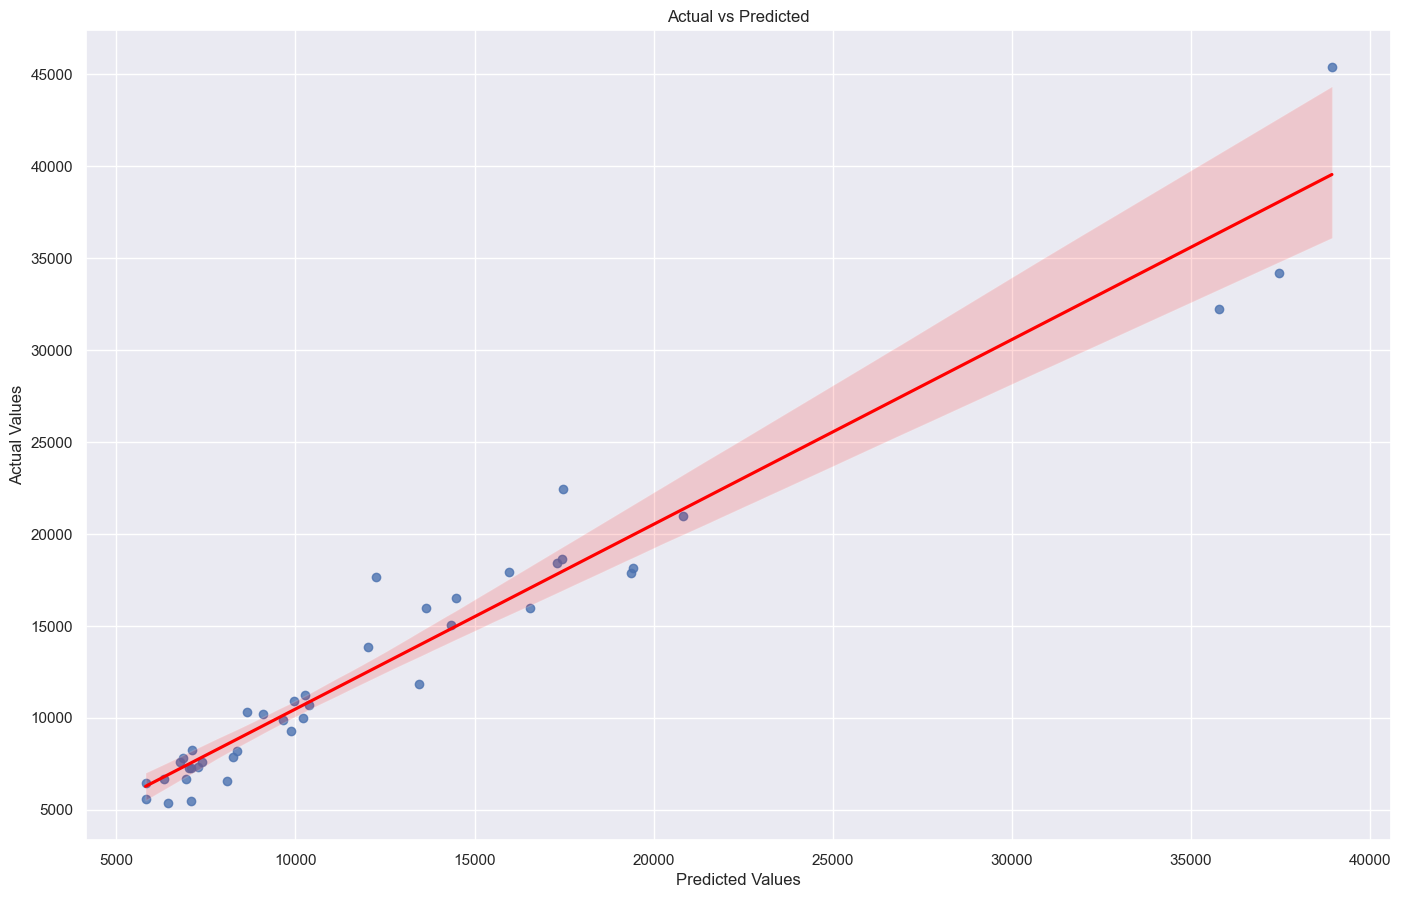

In [78]:
# Plotting the Actual values versus the Predicted values

# Plot with regression line
sns.regplot(x=predictions, y=y_test, line_kws={"color": "red"})

plt.title('Actual vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Joining original data with predictions

In [185]:
# Fixing the train df
final_d = pd.DataFrame(X_train, columns = X_columns.columns[:X_train.shape[1]])
final_d['price'] = y_train.values
final_d['Phase'] = 'Existing data'
final_d['Price Predictions'] = y_pred
print(final_d.shape)


# Fixing the test df
final_d2 = pd.DataFrame(X_test, columns = X_columns.columns[:X_test.shape[1]])
final_d2['price'] = y_test.values
final_d2['Phase'] = 'New Unseen data'
final_d2['Price Predictions'] = reg.predict(X_test)
print(final_d2.shape)

#union
final_d3 = pd.concat([final_d,final_d2],ignore_index=True)
print(final_d3.shape)

# Left joining the original data set to the predictions
data['car_ID'] = data['car_ID'].astype(int) 
final_d3['car_ID'] = final_d3['car_ID'].astype(int)

final_4 = data.merge(final_d3[['car_ID','Phase','Price Predictions']], how='left', on='car_ID')
final_4['CarName'] = final_4['CarName'] + ' - ' + final_4['car_ID'].astype(str)
print(final_4.shape)
final_4.head()

(164, 50)
(41, 50)
(205, 50)
(205, 28)


car_ID  symboling                       CarName fueltype aspiration  \
0       1          3        alfa-romero giulia - 1      gas        std   
1       2          3       alfa-romero stelvio - 2      gas        std   
2       3          1  alfa-romero Quadrifoglio - 3      gas        std   
3       4          2               audi 100 ls - 4      gas        std   
4       5          2                audi 100ls - 5      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0        two  convertible        rwd          front       88.6  ...   
1        two  convertible        rwd          front       88.6  ...   
2        two    hatchback        rwd          front       94.5  ...   
3       four        sedan        fwd          front       99.8  ...   
4       four        sedan        4wd          front       99.4  ...   

   boreratio  stroke  compressionratio  horsepower peakrpm citympg  \
0       3.47    2.68               9.0         111    5000      21   
1       3.47    2.68               9.0         111    5000      21   
2       2.68    3.47               9.0         154    5000      19   
3       3.19    3.40              10.0         102    5500      24   
4       3.19    3.40               8.0         115    5500      18   

   highwaympg    price            Phase  Price Predictions  
0          27  13495.0    Existing data       14030.631995  
1          27  16500.0    Existing data       15868.214832  
2          26  16500.0  New Unseen data       16644.131234  
3          30  13950.0    Existing data       13923.215678  
4          22  17450.0    Existing data       17130.875554  

[5 rows x 28 columns]

In [186]:
# Exporting the final work to a csv file for visualisation
final_4.to_csv('car_predictions.csv', index=False)